## Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of churn :**
There are various ways to define churn, such as:
1. Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
2. Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we will use the usage-based definition to define churn.

**The solution is divided into the following sections:**
- Data Understanding and Exploration
- Data Cleaning, Manipulation and Visualisation
- Data Preparation
- Model building and evaluation
- Conclusion
- Recommendation

## Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the dataset & checking first 5 rows

churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking rows and columns
print("-------- Checking Rows and Columns --------")
churn.shape

-------- Checking Rows and Columns --------


(99999, 226)

In [5]:
# checking the statistical values of numerical columns
print("-------- Checking Statistical values of Numeric columns --------")
churn.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

-------- Checking Statistical values of Numeric columns --------


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Outlier are present as we can see huge difference between 99th percentile and max value for many columns

In [6]:
 # Lets see if we have any Duplicate records
print("-------- Checking presence of Duplicate Records --------")
churn[churn.duplicated(keep=False)]

-------- Checking presence of Duplicate Records --------


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [7]:
#checking datatypes and NULL info
print("-------- Checking Datatypes and Not NULL count --------")
churn.info()

-------- Checking Datatypes and Not NULL count --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Checking NULL records as Percentage
print("-------- Checking Null (%) --------")
round((churn.isna().sum()/len(churn.index))*100,2).sort_values(ascending=False)

-------- Checking Null (%) --------


arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

Lets focus on columns which have more than 30% missing values

In [9]:
# Columns with more than 30% missing records
print("-------- Column list for more than 30% Null values--------")
missing = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing.loc[missing > 30])

-------- Column list for more than 30% Null values--------
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9              

Out the these 40 features, many are required and are essential for analysis.e.g - featues like 'av_rech_amt_data' or 'total_rech_data' are essential for further analysis, so these cannot be dropped.
We we will analyse each set and perform necessary actions like imputing/dropping now.

## Data Cleaning, Manipulation and Visualisation

### Handling Missing values

In [10]:
# Making a copy of data in case we need to refer the original dataset
#original = churn.copy()

#### Lets look into Recharge column and treat missing values

In [11]:
# Lets handle to missing values in 'rech' columns first, create a list of recharge columns 

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can see missing values in Recharge columns, may be the customer didn't recharge at all for that month.
Lets analyse 1 column to see if its true

In [12]:
# Analysing 6th month missing values in recharge (total_rech_data_6)

churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ['total_rech_data_6','date_of_last_rech_data_6']].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


We can see that our assumption is right. We can conclude that as customer has not recharged that's why missing values. So we will choose to impute these with '0'

In [13]:
# impute missing values with 0

churn[recharge_cols] = churn[recharge_cols].apply(lambda x: x.fillna(0))

In [14]:
#Verifying the imputation

print(churn[recharge_cols].isnull().sum()*100/churn.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64


All successfully imputed.

Now lets divide the column present in the dataset into categories to perform action on bulk

In [15]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

In [16]:
# print number of columns in each list
print('1.ID cols: {0} cols\n2.Date cols:{1} cols\n3.Numeric cols:{2} cols\n4.Category cols:{3} cols'.format(len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

1.ID cols: 2 cols
2.Date cols:12 cols
3.Numeric cols:204 cols
4.Category cols:8 cols


All 226 columns are now divdied logically in categories

In [17]:
# date columns analysis
# we can see that it has 2 sets of columns:
# 1. last_date_of_month_x : this contains the last date of every month, no uselful information.
# 2. date_of_last_rech_x : this might be useful but not in date form, we need to create new variables to process this information

# 1. 
print(churn['last_date_of_month_6'].value_counts())
print('*'*40)
print(churn['last_date_of_month_7'].value_counts())
print('*'*40)
print(churn['last_date_of_month_8'].value_counts())

# 2. creating new columns called is_rech for each month which shows if a customer has recharged in the particular month or not.
churn['is_rech_6'] = 1
churn['is_rech_7'] = 1
churn['is_rech_8'] = 1

churn.loc[churn['date_of_last_rech_6'].isnull(),'is_rech_6'] = 0
churn.loc[churn['date_of_last_rech_7'].isnull(),'is_rech_7'] = 0
churn.loc[churn['date_of_last_rech_8'].isnull(),'is_rech_8'] = 0

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
****************************************
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
****************************************
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64


In [18]:
# dropping id and date columns as these are not significant in analysis 
# we already have 4 months data and date column is useful for timeseries anaysis, which we are not doing here.
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 229)
Shape after dropping:  (99999, 215)


#### Now lets work on missing values for Categorical columns

We will replace missing values in the categorical values = mode

In [19]:
# replace missing values with 'mode' in categorical columns
modes=churn[cat_cols].agg('mode')
#modes['fb_user_7'][0]

for col in cat_cols:
    churn[col]=churn[col].fillna(modes[col][0])

In [20]:
# missing value ratio
print("-----Missing value ratio:------\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

-----Missing value ratio:------

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [21]:
# Lets now look at Missing values % again 
print("-------- Column list for more than 30% Null values--------")
missing_1 = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing_1.loc[missing_1 > 30])

-------- Column list for more than 30% Null values--------
arpu_3g_6    74.85
arpu_3g_7    74.43
arpu_3g_8    73.66
arpu_3g_9    74.08
arpu_2g_6    74.85
arpu_2g_7    74.43
arpu_2g_8    73.66
arpu_2g_9    74.08
dtype: float64


In [22]:
# dropping these columns 
churn.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'], 
           axis=1, inplace=True)
churn.shape

(99999, 207)

**Now we have taken care of columns which had high percentage of missing values. Now lets focus on columns which have missing values but low in count**

In [23]:
# Checking columns with missing values > 0
print("-------- Checking columns with missing values > 0--------")
missing_2 = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing_2.loc[missing_2 > 0].sort_values(ascending=False))

-------- Checking columns with missing values > 0--------
ic_others_9         7.75
std_og_t2m_mou_9    7.75
loc_og_t2m_mou_9    7.75
std_ic_t2f_mou_9    7.75
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_9    7.75
og_others_9         7.75
loc_og_mou_9        7.75
std_ic_t2t_mou_9    7.75
std_og_t2t_mou_9    7.75
loc_ic_mou_9        7.75
loc_og_t2t_mou_9    7.75
std_og_t2f_mou_9    7.75
loc_ic_t2f_mou_9    7.75
std_og_t2c_mou_9    7.75
std_og_mou_9        7.75
loc_ic_t2m_mou_9    7.75
isd_og_mou_9        7.75
loc_ic_t2t_mou_9    7.75
spl_og_mou_9        7.75
std_ic_t2o_mou_9    7.75
std_ic_t2m_mou_9    7.75
spl_ic_mou_9        7.75
isd_ic_mou_9        7.75
roam_ic_mou_9       7.75
std_ic_mou_9        7.75
roam_og_mou_9       7.75
onnet_mou_9         7.75
offnet_mou_9        7.75
spl_og_mou_8        5.38
isd_og_mou_8        5.38
loc_ic_t2m_mou_8    5.38
onnet_mou_8         5.38
std_og_t2m_mou_8    5.38
std_og_mou_8        5.38
ic_others_8         5.38
loc_ic_t2f_mou_8    5.38
isd_ic_mou_8     

**Lets Analyse columns for September month (9) first**

In [24]:
#Making list of columns with missing values for September (9) month and filtering dataset to see if all these 
#columns have same set of missing values
missing_9 = ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 
             'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 
             'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 
             'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 
             'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 
             'isd_ic_mou_9', 'ic_others_9']
churn[churn[missing_9].isnull().all(axis=1)][missing_9].head(20)

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Checking number of records/customers who has missing values for September month
churn[churn[missing_9].isnull().all(axis=1)][missing_9].shape

(7745, 29)

**It seems like all these `7745` customers have missing values for these columns. Lets impute these with 0 as all these are numerical columns**

In [26]:
# Imputing missing value = 0
churn[missing_9] = churn[missing_9].apply(lambda x: x.fillna(0))

#Validating the imputation
churn[churn[missing_9].isnull().all(axis=1)][missing_9].shape

(0, 29)

In [27]:
# Checking columns with missing values > 2%
print("-------- Checking columns with missing values > 0--------")
missing_3 = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing_3.loc[missing_3 > 2].sort_values(ascending=False))

-------- Checking columns with missing values > 0--------
ic_others_8         5.38
og_others_8         5.38
std_og_t2t_mou_8    5.38
loc_ic_t2f_mou_8    5.38
loc_ic_t2t_mou_8    5.38
loc_og_mou_8        5.38
loc_ic_mou_8        5.38
std_og_t2f_mou_8    5.38
loc_og_t2c_mou_8    5.38
std_ic_t2t_mou_8    5.38
isd_og_mou_8        5.38
loc_og_t2f_mou_8    5.38
std_ic_t2m_mou_8    5.38
loc_og_t2m_mou_8    5.38
std_og_t2m_mou_8    5.38
std_ic_t2f_mou_8    5.38
loc_og_t2t_mou_8    5.38
std_ic_t2o_mou_8    5.38
std_og_t2c_mou_8    5.38
roam_og_mou_8       5.38
std_ic_mou_8        5.38
roam_ic_mou_8       5.38
spl_ic_mou_8        5.38
spl_og_mou_8        5.38
offnet_mou_8        5.38
isd_ic_mou_8        5.38
std_og_mou_8        5.38
onnet_mou_8         5.38
loc_ic_t2m_mou_8    5.38
loc_ic_t2t_mou_6    3.94
og_others_6         3.94
loc_ic_t2m_mou_6    3.94
std_ic_t2m_mou_6    3.94
loc_ic_t2f_mou_6    3.94
loc_ic_mou_6        3.94
std_ic_t2t_mou_6    3.94
std_ic_t2f_mou_6    3.94
std_ic_t2o_mou_6 

In [28]:
#Getting column list from above Panda series
missing_3_df = pd.DataFrame(missing_3.loc[missing_3 > 2])
missing_3_cols = missing_3_df.index
missing_3_cols.shape

(87,)

Now, there are 87 features who have missing values now.
Lets analyse them and see if we can find count of customers who has all missing values for all these columns.
Lets use the same method which we used earlier.

In [29]:
#Making list of columns with missing values and filtering dataset to see if all these 
#columns have same set of missing values

churn[churn[missing_3_cols].isnull().all(axis=1)][missing_3_cols].head(20)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [30]:
#Checking number of records/customers who has missing values for September month
churn[churn[missing_3_cols].isnull().all(axis=1)][missing_3_cols].shape

(1099, 87)

**It seems like all these `1099` customers have missing values for these columns. Lets impute these with 0 as all these are numerical columns**

In [31]:
# Imputing missing value = 0
churn[missing_3_cols] = churn[missing_3_cols].apply(lambda x: x.fillna(0))

#Validating the imputation
churn[churn[missing_3_cols].isnull().all(axis=1)][missing_3_cols].shape

(0, 87)

**Checking again the columns for missing values**

In [32]:
# Checking columns with missing values > 0
print("-------- Checking columns with missing values > 0--------")
missing_rem = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing_rem.loc[missing_rem > 0].sort_values(ascending=False))

-------- Checking columns with missing values > 0--------
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
dtype: float64


Now, we have only 3 columns left which have missing values around 1%. Lets analyse them to see which imputation can be used.

In [33]:
#Lets see what values these columns contains
print("loc_og_t2o_mou:{0}".format(churn['loc_og_t2o_mou'].unique()))
print("std_og_t2o_mou:{0}".format(churn['std_og_t2o_mou'].unique()))
print("loc_ic_t2o_mou:{0}".format(churn['loc_ic_t2o_mou'].unique()))

loc_og_t2o_mou:[ 0. nan]
std_og_t2o_mou:[ 0. nan]
loc_ic_t2o_mou:[ 0. nan]


Lets Drop them they have have only 1 value = 0

In [34]:
# Dropping from the dataset
churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1, inplace=True)
churn.shape

(99999, 204)

**Checking again the columns for missing values**

In [35]:
# Checking columns with missing values > 0
print("-------- Checking columns with missing values > 0--------")
missing_rem = round((churn.isna().sum()/len(churn.index))*100,2)
print(missing_rem.loc[missing_rem > 0].sort_values(ascending=False))

-------- Checking columns with missing values > 0--------
Series([], dtype: float64)


### Checking for columns with hight skewed values and dropping them

In [36]:
#Checking cols with only 1 value in them. These are not useful in any analysis since they wont explain
# any variance in data while building the model. These can be dropped directly.

high_value_dict = {}
for x in churn.columns.tolist():
    l = round(100*(churn[x].value_counts().iloc[0]/len(churn)))
    high_value_dict[x] = l

high_df = pd.DataFrame.from_dict(high_value_dict,orient = 'index')

In [37]:
high_df.sort_values(by = 0,ascending = False).head(15)

,0
night_pck_user_9,100
std_og_t2c_mou_7,100
og_others_9,100
og_others_7,100
std_ic_t2o_mou_6,100
std_ic_t2o_mou_7,100
std_ic_t2o_mou_8,100
og_others_8,100
std_og_t2c_mou_6,100
std_ic_t2o_mou_9,100


In [38]:
#Dropping variables which have only 1 Unique value

churn.drop(high_df[high_df[0]>=99].index, axis=1, inplace=True)
churn.shape

(99999, 189)

**Objective provided is to Filter High-value customers.
Customers those who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months.**

### Deriving new column to calculate to spend amount on recharge for 6th & 7th month

In [39]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['total_data_rech_8'] = churn.total_rech_data_8 * churn.av_rech_amt_data_8

In [40]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['total_amt_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['total_amt_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7
churn['total_amt_8'] = churn.total_rech_amt_8 + churn.total_data_rech_8

In [41]:
# calculate average recharge done by customer in June and July
churn['avg_amt_data_6_7'] = (churn.total_amt_6 + churn.total_amt_7)/2

In [42]:
churn['avg_amt_data_6_7'].isnull().sum()

0

### Filtering customer based on 70 percentile cutoff

In [43]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.avg_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [44]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.avg_amt_data_6_7 >= churn.avg_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 196)

In [45]:
# cleaningup variables created to filter high-value customers
#churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
#                                      'amt_data_6', 'amt_data_7', 'avg_amt_data_6_7'], axis=1)
#churn_filtered.shape

**We're left with 30,001 rows after selecting the high value customers who have provided recharge value of more than or equal to the 70th percentile cutoff**

### Derving Churners based on condition provided in the case Study

Churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [46]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [47]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [48]:
# creating 'churn' variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if (x['total_calls_mou_9']==0 and x['total_internet_mb_9']==0) 
                                               else 0, axis=1)

In [49]:
# Cleaningup derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [50]:
# change data type to category
#churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


We can see that ONLY 8% customer have Churned in the last month (September). This is a **Imbalanced** dataset.
We will handle this imbalance in next section

### Removing ALL variables for the `churn` month - 9th Month

In [51]:
#Another important thing is that all the columns corresponding to 9 (september) is not relevent for us now.
#Because we want to predict the 'churn' of 9 based on the data from 6 and 7
#So, let's drop the other columns for the month of 9
cols_sep = [x for x in list(churn_filtered) if '_9' in x or 'sep' in x or 'Sep' in x or 'September' in x or 'september' in x]
churn_filtered = churn_filtered.drop(cols_sep, axis = 1)
churn_filtered.shape

(30001, 151)

### Lets plot sum visualisation - `columns` VS Churn, to understand any pattern in pre-paid customer

In [52]:
churn_filtered.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,is_rech_6,is_rech_7,is_rech_8,total_data_rech_6,total_data_rech_7,total_data_rech_8,total_amt_6,total_amt_7,total_amt_8,avg_amt_data_6_7,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

#### Number of Recharge VS Churn

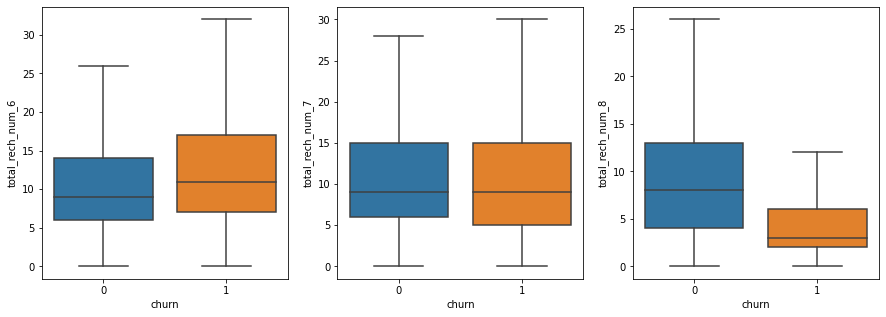

In [53]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['total_rech_num_6','total_rech_num_7','total_rech_num_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

From above figure we can see that - Total number of recharge is going down month by month for customer who have identified as Churn.

#### Total Recharge Amount VS Churn

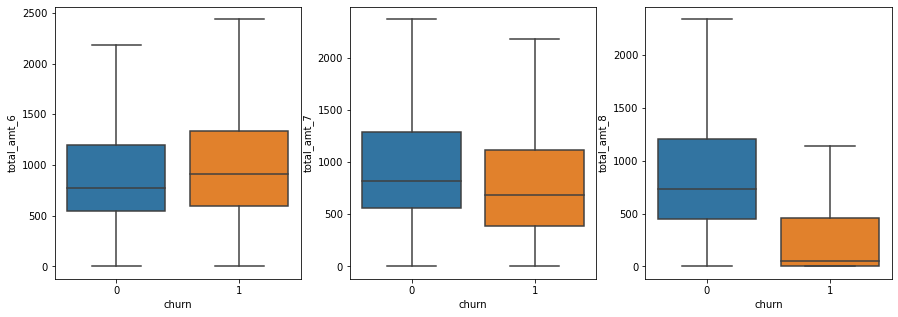

In [54]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['total_amt_6','total_amt_7','total_amt_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [55]:
# Checking the numbers against 'Churn'
churn_filtered[['total_amt_6','total_amt_7','total_amt_8','churn']].groupby('churn').median()

,total_amt_6,total_amt_7,total_amt_8
churn,,,
0,778.0,824.0,730.0
1,910.0,687.0,50.0


From above figure and table we can see that - Amount of recharge is going down month by month for customer who have identified as Churn.

#### Incoming Calls VS Churn

In [56]:
#List of columns for Incoming calls data
[col for col in churn_filtered.columns if 'ic' in col]

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

##### Total Incoming calls vs Churn

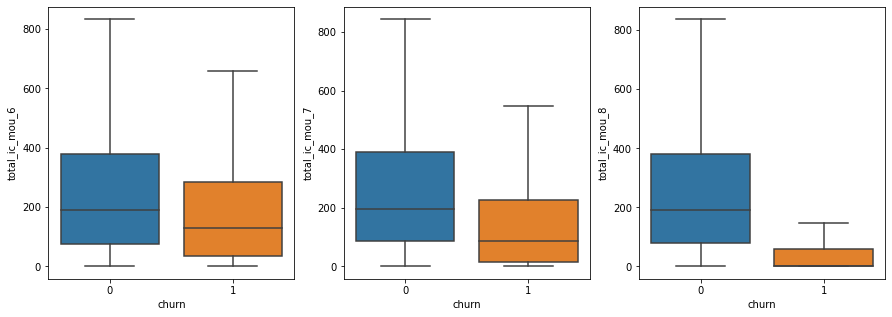

In [57]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [58]:
# Checking the numbers against 'Churn'
churn_filtered[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']].groupby('churn').median()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,188.75,196.73,191.93
1,128.36,88.54,0.00


Total Incoming calls has similar values for Non Churn customer BUT for Churn customer we can see that its going down and 0 in 8th month.

##### Local Incoming calls vs Churn

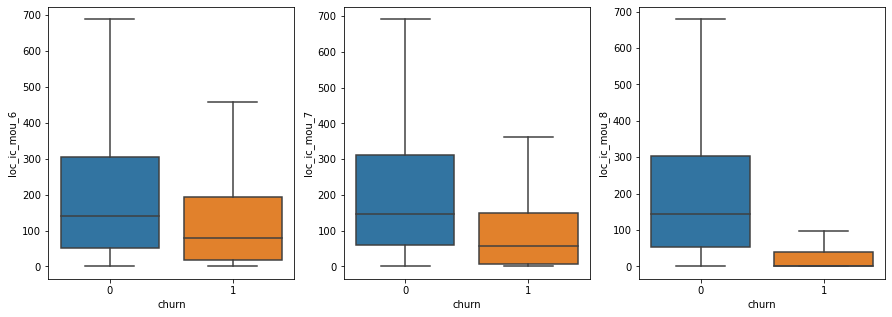

In [59]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [60]:
# Checking the numbers against 'Churn'
churn_filtered[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8', 'churn']].groupby('churn').median()

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
churn,,,
0,140.685,146.435,143.53
1,78.210,56.980,0.00


Similar pattern here as well - for Churn customer we can see that LOCAL incoming calls have gone down month by month and 0 in 8th month.

##### STD Incoming calls vs Churn

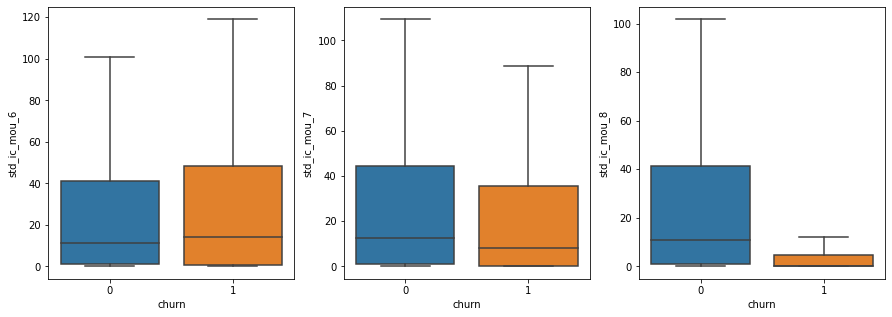

In [61]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [62]:
# Checking the numbers against 'Churn'
churn_filtered[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8', 'churn']].groupby('churn').median()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
churn,,,
0,11.235,12.41,10.93
1,14.160,8.26,0.00


Similar pattern here as well - for Churn customer we can see that STD incoming calls have gone down month by month and 0 in 8th month.

##### Roaming calls vs Churn

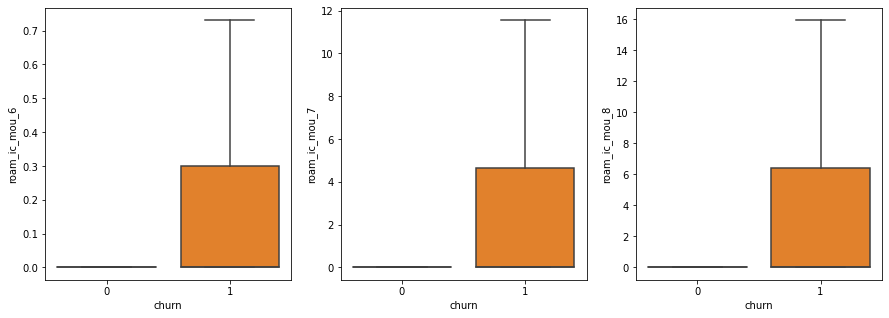

In [63]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [64]:
# Checking the numbers against 'Churn'
churn_filtered[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']].groupby('churn').mean()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
churn,,,
0,14.972025,11.108306,11.195356
1,28.962614,29.964297,27.236800


The customers who have churned have large amount of roaming incoming calls than the non churned customers

#### Outgoing Calls VS Churn

In [65]:
#List of columns for Incoming calls data
[col for col in churn_filtered.columns if 'og' in col]

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

##### Total outgoing calls vs Churn

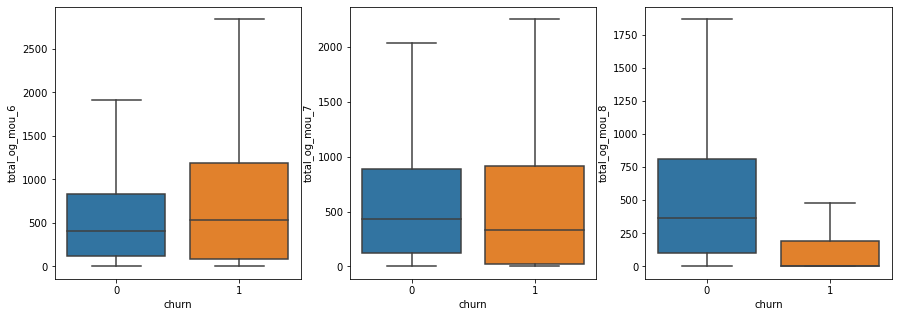

In [66]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['total_og_mou_6','total_og_mou_7','total_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [67]:
# Checking the numbers against 'Churn'
churn_filtered[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']].groupby('churn').median()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,403.785,431.415,367.735
1,531.160,334.630,0.000


We can see that the median of outgoing calls kept decreasing with very a `steep` decent through the months`

##### Local outgoing calls vs Churn

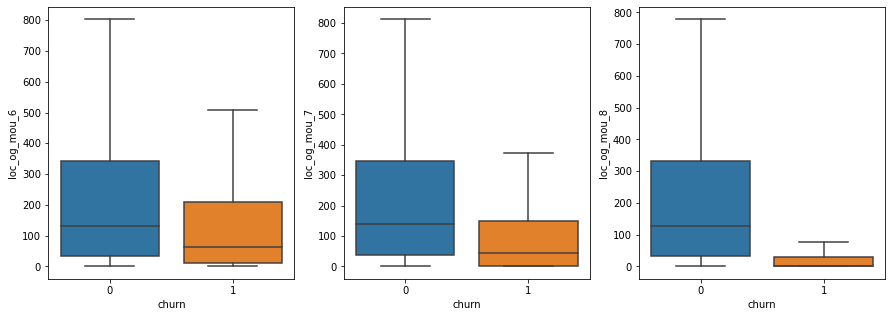

In [68]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [69]:
# Checking the numbers against 'Churn'
churn_filtered[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']].groupby('churn').median()

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
churn,,,
0,131.32,138.04,128.385
1,64.48,45.16,0.000


We can see that - for churn customers it is almost 0 in the 8th month and also they have significantly lower outgoing calls when compared to non churn cutomers

##### STD outgoing calls vs Churn

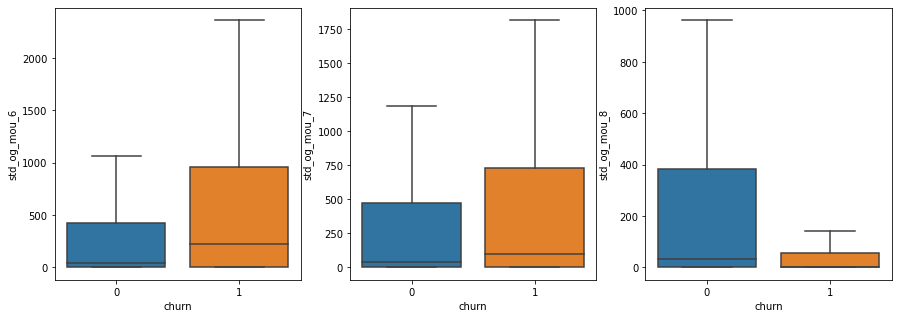

In [70]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['std_og_mou_6','std_og_mou_7','std_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [71]:
# Checking the numbers against 'Churn'
churn_filtered[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']].groupby('churn').median()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,39.695,42.08,32.18
1,227.180,96.04,0.00


We can see that - for churn customers it is almost 0 in the 8th month and also the decrease is steep.

##### Roaming outgoing calls vs Churn

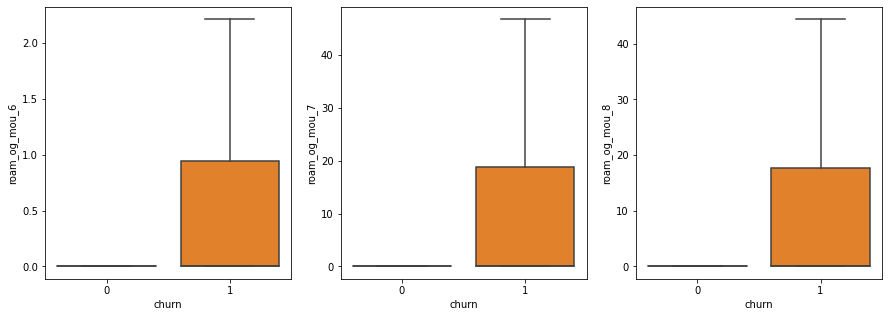

In [72]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [73]:
# Checking the numbers against 'Churn'
churn_filtered[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']].groupby('churn').mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,24.337114,17.496533,17.760013
1,51.799316,50.134482,43.638824


The customers who have churned have large amount of std out going calls in the 6th month, but as with the progession their roam outgoing calls have also decreased.

#### Age on Network (AON) VS Churn

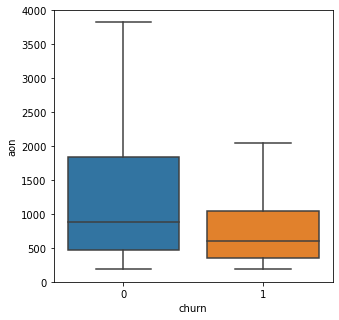

In [74]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (5,5))
sns.boxplot(x = 'churn',y = 'aon',data = churn_filtered,showfliers = False)
plt.show()

In [75]:
churn_filtered[['aon','churn']].groupby('churn').mean()

,aon
churn,
0,1240.228120
1,860.952478


Mean Age for AON , for churn customers is almost half of that of the non churn customers.

#### Internet (2G or 3G) VS Churn

In [76]:
#Getting column list
internet_cols = [col for col in churn_filtered.columns if '_2g' in col or '_3g' in col]
internet_cols

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [77]:
#Validation skewness in these column values against the Churn 
print('vol_2g_mb_6')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_2g_mb_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1460/churn_filtered.churn.value_counts()[1])))
print('vol_2g_mb_7')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_2g_mb_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1623/churn_filtered.churn.value_counts()[1])))
print('vol_2g_mb_8')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_2g_mb_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2105/churn_filtered.churn.value_counts()[1])))
print('vol_3g_mb_6')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_3g_mb_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1768/churn_filtered.churn.value_counts()[1])))
print('vol_3g_mb_7')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_3g_mb_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1884/churn_filtered.churn.value_counts()[1])))
print('vol_3g_mb_8')
print('*'*40)
print(pd.crosstab(churn_filtered.vol_3g_mb_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2200/churn_filtered.churn.value_counts()[1])))
print('monthly_2g_6')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_2g_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2246/churn_filtered.churn.value_counts()[1])))
print('monthly_2g_7')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_2g_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2284/churn_filtered.churn.value_counts()[1])))
print('monthly_2g_8')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_2g_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2388/churn_filtered.churn.value_counts()[1])))
print('sachet_2g_6')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_2g_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1788/churn_filtered.churn.value_counts()[1])))
print('sachet_2g_7')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_2g_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1877/churn_filtered.churn.value_counts()[1])))
print('sachet_2g_8')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_2g_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2153/churn_filtered.churn.value_counts()[1])))
print('monthly_3g_6')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_3g_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2094/churn_filtered.churn.value_counts()[1])))
print('monthly_3g_7')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_3g_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2175/churn_filtered.churn.value_counts()[1])))
print('monthly_3g_8')
print('*'*40)
print(pd.crosstab(churn_filtered.monthly_3g_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2334/churn_filtered.churn.value_counts()[1])))
print('sachet_3g_6')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_3g_6,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2177/churn_filtered.churn.value_counts()[1])))
print('sachet_3g_7')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_3g_7,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2222/churn_filtered.churn.value_counts()[1])))
print('sachet_3g_8')
print('*'*40)
print(pd.crosstab(churn_filtered.sachet_3g_8,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2369/churn_filtered.churn.value_counts()[1])))
print('aug_vbc_3g')
print('*'*40)
print(pd.crosstab(churn_filtered.aug_vbc_3g,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(2107/churn_filtered.churn.value_counts()[1])))
print('jul_vbc_3g')
print('*'*40)
print(pd.crosstab(churn_filtered.jul_vbc_3g,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1875/churn_filtered.churn.value_counts()[1])))
print('jun_vbc_3g')
print('*'*40)
print(pd.crosstab(churn_filtered.jun_vbc_3g,churn_filtered.churn).head())
print('Percentage:{0}'.format(100*(1826/churn_filtered.churn.value_counts()[1])))

vol_2g_mb_6
****************************************
churn            0     1
vol_2g_mb_6             
0.00         13543  1460
0.01            60     3
0.02            40     4
0.03            25     2
0.04            23     3
Percentage:59.811552642359686
vol_2g_mb_7
****************************************
churn            0     1
vol_2g_mb_7             
0.00         13220  1623
0.01            42     4
0.02            46     7
0.03            23     4
0.04            28     1
Percentage:66.48914379352723
vol_2g_mb_8
****************************************
churn            0     1
vol_2g_mb_8             
0.00         14081  2105
0.01            53     5
0.02            44     6
0.03            36     2
0.04            20     1
Percentage:86.2351495288816
vol_3g_mb_6
****************************************
churn            0     1
vol_3g_mb_6             
0.00         17599  1768
0.01            11     1
0.02             6     1
0.03            10     0
0.04             1     1
P

From above we can see that all columns have > 70% of values skewed w.r.t Churn = 1

We will choose to drop these columns.

In [78]:
#dropping these columns
print('Dataframe shape before dropping:', churn_filtered.shape)

churn_filtered = churn_filtered.drop(internet_cols,axis=1)
print('Dataframe shape after dropping:', churn_filtered.shape)
churn_filtered.info()

Dataframe shape before dropping: (30001, 151)
Dataframe shape after dropping: (30001, 124)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 124 entries, arpu_6 to churn
dtypes: float64(107), int64(17)
memory usage: 28.4 MB


#### Arpu VS Churn

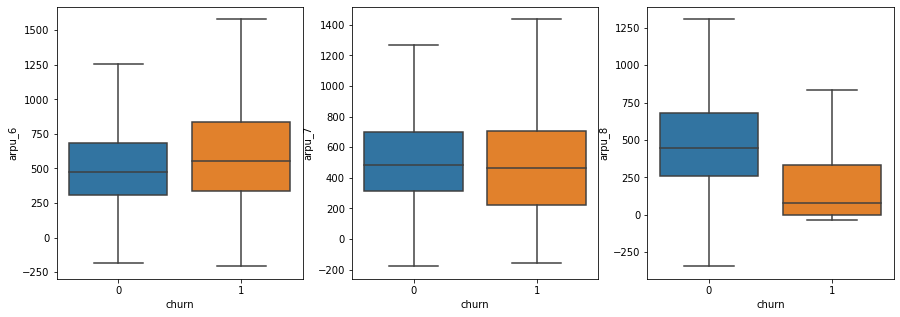

In [79]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['arpu_6','arpu_7','arpu_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [80]:
# Checking the numbers against 'Churn'
churn_filtered[['arpu_6','arpu_7','arpu_8','churn']].groupby('churn').mean()

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


The customers who have churned have given large revenue in the 6th month, but in following months towards churn their revenue have decreased.

#### Onnet VS Churn

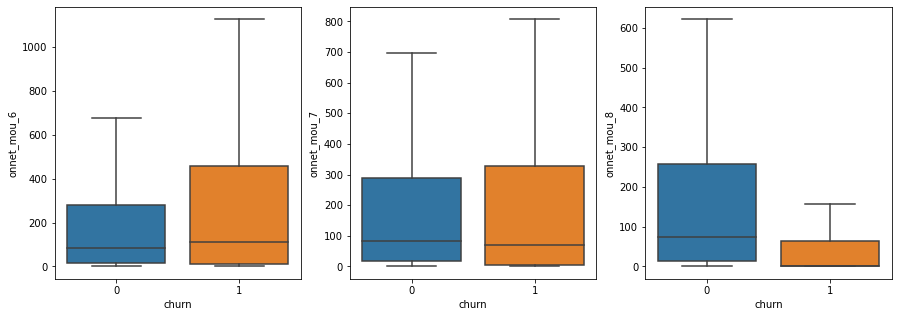

In [81]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['onnet_mou_6','onnet_mou_7','onnet_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [82]:
# Checking the numbers against 'Churn'
churn_filtered[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']].groupby('churn').mean()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
churn,,,
0,251.203938,265.641432,244.819433
1,369.058173,292.408353,113.226846


The customers who have churned has a decreasing onnnet calls per month as we move from June to August month.

#### Offnet VS Churn

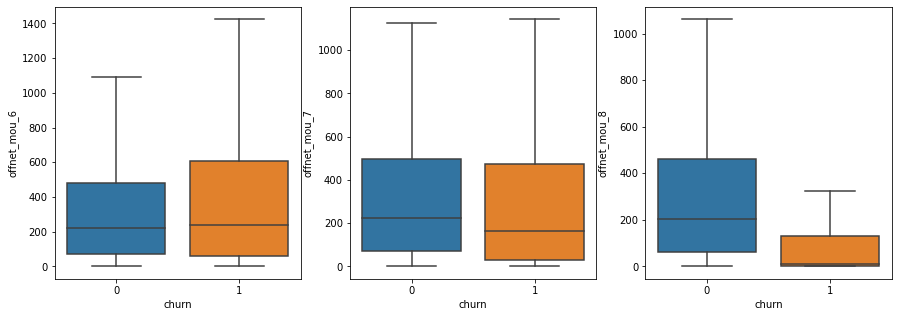

In [83]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['offnet_mou_6','offnet_mou_7','offnet_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = churn_filtered,showfliers = False)
    i = i+1
plt.show()

In [84]:
# Checking the numbers against 'Churn'
churn_filtered[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']].groupby('churn').mean()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
churn,,,
0,365.046203,377.809741,352.510204
1,471.331073,381.416104,138.248751


The customers who have churned has a decreasing offnet calls per month as we move from June to August month.

#### Is_rech VS Churn

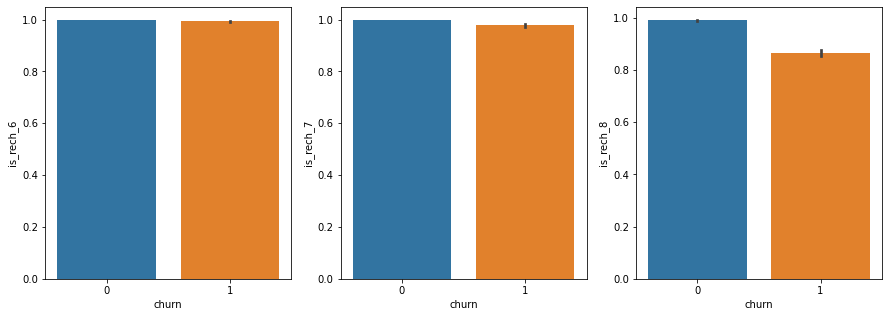

In [85]:
#Boxplot to visualise relationship with 'Churn' variable
plt.figure(figsize = (15,5))
i = 1
for col in ['is_rech_6','is_rech_7','is_rech_8']:
    plt.subplot(1,3,i)
    sns.barplot(x = 'churn',y = col,data = churn_filtered)
    i = i+1
plt.show()

In [86]:
# Checking the numbers against 'Churn'
churn_filtered[['is_rech_6','is_rech_7','is_rech_8','churn']].groupby('churn').mean()

,is_rech_6,is_rech_7,is_rech_8
churn,,,
0,0.997968,0.998367,0.990711
1,0.993036,0.978288,0.866039


The customers who have churned has stopped recharging their mobiles as the months progress from 6th to 8th which can be seen in decrease in `is_rech` values, which is a derived column from `last_day_of_rech`

### Correlation with Churn variable

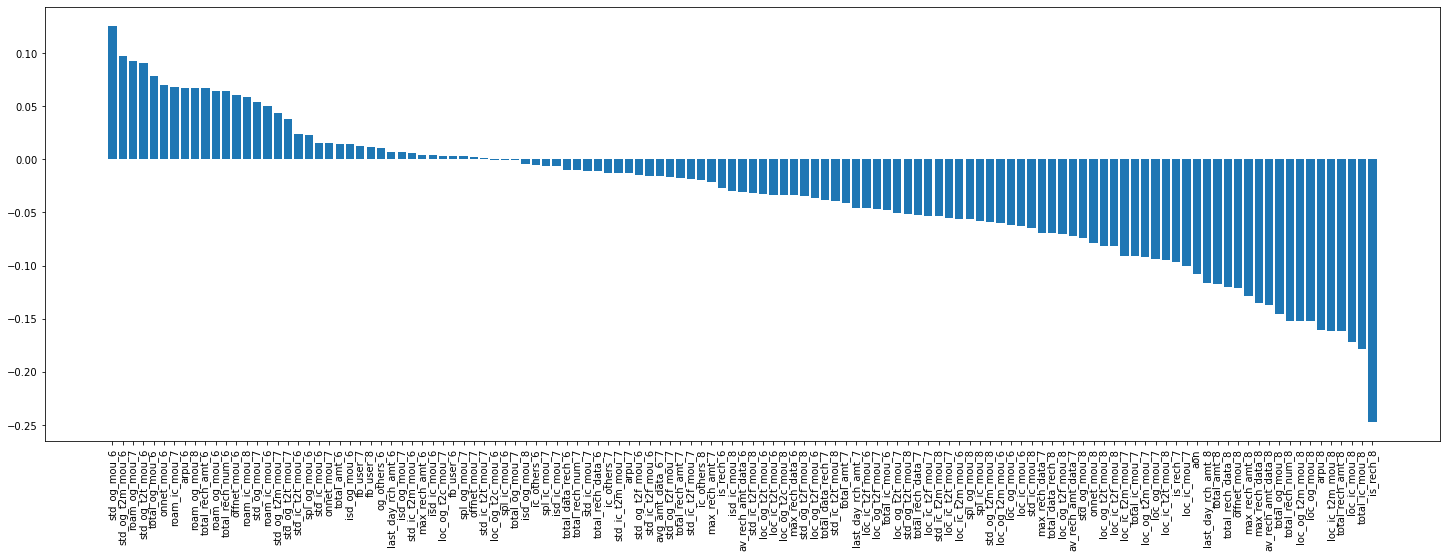

In [87]:
# Creating a Correlation visualisation
corr = churn_filtered.corr()['churn'].sort_values(ascending = False)[1:]
plt.figure(figsize = (25,8))
plt.bar(range(len(corr)),corr)
plt.xticks(range(len(corr)),corr.index,rotation = 'vertical')
plt.show()

- We can see that the drop of `outgoing(og)`calls and `not recharging` the mobiles in the 8th seems to signify that the customer is going to churn. 
- We can also see that the `std` and `roam` variables are also contributing to the churn positively where as `max rech` and `total calls` seems to effect the churn negatively.

### Creating New variables - Average of first 2 months (6th & 7th) and difference of this with 8th month

In [88]:
churn_filtered.columns.to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',


In [89]:
# Dropping columns 'total' variables as we are going to create new ones for average
#churn_filtered = churn_filtered.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6',
#                                      'total_rech_amt_7','total_rech_amt_8','avg_amt_data_6_7'],axis = 1)

# dropping the earlier derived column
churn_filtered = churn_filtered.drop(['avg_amt_data_6_7','og_others_6'], axis = 1)

In [90]:
# separating out column which doesnt need modification
cols_to_excempt = ['is_rech_6','is_rech_7','is_rech_8']

In [91]:
# Creating separate list of 6th and 7th month variables and 
six_cols_list = []
seven_cols_list = []
for x in churn_filtered.columns:
    if '_6' in x and x not in cols_to_excempt :
        six_cols_list.append(x)
    if '_7' in x and x not in cols_to_excempt :
        seven_cols_list.append(x)

In [92]:
# Creating identical columns set to use when creating difference variable
six_cols1 = [x.replace('_6','') for x in six_cols_list]

In [93]:
# Creating AVERAGE variable between 6th and 7th month
for x in six_cols1:
    out = 'av_'+x+'_6_7'
    in_6 = x+'_6'
    in_7 = x+'_7'
    churn_filtered[out] = (churn_filtered[in_6]+churn_filtered[in_7])/2

In [94]:
# Creating DIFFERENCE column with 8th month variable
for x in six_cols1:
    out1 = 'diff_'+x
    in_av = 'av_'+x+'_6_7'
    in_8 = x+'_8'
    churn_filtered[out1] = churn_filtered[in_av]-churn_filtered[in_8]

In [95]:
# Dropping the original _6 and _7 columns now.
churn_filtered.drop(six_cols_list+seven_cols_list,axis = 1,inplace = True)

In [96]:
# Checking column list now
churn_filtered.columns.tolist()

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'fb_user_8',
 'aon',
 'is_rech_6',
 'is_rech_7',
 'is_rech_8',
 'total_data_rech_8',
 'total_amt_8',
 'churn',
 'av_arpu_6_7',
 'av_onnet_mou_6_7',
 'av_offnet_mou_6_7',
 'av_roam_ic_mou_6_7',
 'av_roam_og_mou_6_7',
 'av_loc_og_t2t_mou_6_7',
 'av_loc_og_t2m_mou_6_7',
 'av_loc_og_t2f_mou_6_7',
 'av_loc_og_t

In [97]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 122 entries, arpu_8 to diff_total_amt
dtypes: float64(113), int64(9)
memory usage: 27.9 MB


## Data Preparation

### Handling Imbalanced dataset - SMOTE

In [98]:
# Separating Predictors and Target variables 
X = churn_filtered.drop('churn',axis=1)
y = churn_filtered.churn

In [99]:
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

We can see highly imbalance data.

In [100]:
smote = SMOTE(sampling_strategy='auto', random_state=12)
X_balanced, y_balanced = smote.fit_resample(X,y)

print(len(y_balanced))
print('\n')
print(pd.Series(y_balanced).value_counts())

55120


0    27560
1    27560
Name: churn, dtype: int64


We can now see that data is balanced using Over Sampling technique

### Test - Train Split and Scaling

In [101]:
# Converting X_balanced and y_balanced into DataFrame and Series respectively

X_balanced = pd.DataFrame(X_balanced,columns = X.columns)
y_balanced = pd.Series(y_balanced)

#### Train-Test Split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,train_size = 0.7,test_size = 0.3,
                                                 stratify = y_balanced,random_state = 12)

#### Scaling

In [103]:
# Scaling Train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [104]:
#Converting into DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_train_scaled.index = X_train.index
X_train_scaled.shape

(38584, 121)

In [105]:
X_train_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,fb_user_8,aon,is_rech_6,is_rech_7,is_rech_8,total_data_rech_8,total_amt_8,av_arpu_6_7,av_onnet_mou_6_7,av_offnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_loc_og_t2t_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_mou_6_7,av_isd_og_mou_6_7,av_spl_og_mou_6_7,av_total_og_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_mou_6_7,av_total_ic_mou_6_7,av_spl_ic_mou_6_7,av_isd_ic_mou_6_7,av_ic_others_6_7,av_total_rech_num_6_7,av_total_rech_amt_6_7,av_max_rech_amt_6_7,av_last_day_rch_amt_6_7,av_total_rech_data_6_7,av_max_rech_data_6_7,av_av_rech_amt_data_6_7,av_fb_user_6_7,av_total_data_rech_6_7,av_total_amt_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_fb_user,diff_total_data_rech,diff_total_amt
15406,0.121895,-0.150352,-0.181052,-0.199300,-0.240937,0.305074,0.324175,-0.253074,-0.223542,0.380902,-0.304171,-0.323355,-0.118630,-0.415204,-0.072385,0.266144,-0.162745,0.505546,0.268865,-0.100338,0.417131,0.035248,-0.087740,0.048731,-0.044940,0.312784,2.457832,-0.141624,0.011142,0.534885,0.072159,-0.133451,-0.114193,-0.430805,-0.487714,-0.472485,0.241243,-0.654343,0.085498,0.146066,0.365272,-0.231181,-0.173785,-0.325484,-0.360870,-0.125051,-0.240804,-0.285122,0.257429,0.565975,-0.199662,-0.266128,0.515528,-0.474286,-0.334340,-0.155634,-0.553164,-0.100389,0.125585,-0.278991,0.055479,1.019563,-0.272591,0.697963,-0.151156,-0.027414,-0.175496,-0.124457,0.517889,0.293740,-0.186866,0.083477,0.098620,-0.342112,-0.560943,-0.410928,-0.620930,-0.682487,-0.702874,0.254666,-0.393565,-0.499420,-0.449295,-0.285717,0.036434,-0.027186,-0.053702,-0.054130,0.365353,-0.010100,-0.062801,0.223155,-0.282938,-0.091685,-0.069562,-0.245521,-0.063822,-0.135238,-0.144988,-0.614614,0.996346,-0.242055,0.414931,-0.209812,0.072135,-0.240782,-0.104670,0.288445,-1.311090,-0.075666,0.103260,-0.440087,-0.405764,-0.424187,-0.216549,-0.246252,-0.247822,-0.258778,-0.042005,-0.122896,-0.254593
25289,0.165296,-0.030733,0.045229,-0.199300,-0.240937,0.471243,-0.323789,0.004037,-0.223542,0.078038,-0.253849,0.294239,-0.118630,0.028458,-0.072385,-0.282924,0.051976,-0.155253,-0.428076,-0.269925,-0.407269,-0.153149,0.464402,-0.111601,0.272339,-0.258239,-0.167224,-0.057920,-0.077179,1.373303,0.149772,-0.555382,-0.268287,-0.430805,-0.487714,-0.472485,0.241243,1.238125,0.085498,0.146066,0.365272,-0.231181,-0.145281,-0.287256,-0.340757,-0.265404,-0.099720,0.713531,0.122918,-0.458742,-0.128587,-0.266128,-0.237420,-0.443652,-0.221249,-0.155634,-0.453998,-0.100389,-0.397238,-0.547267,-0.247561,-0.411167,-0.079386,-0.413102,-0.216734,0.030290,-0.175496,-0.122805,-0.427871,-0.295222,-0.134937,-0.094886,0.0986

In [106]:
# Scaling the Test set
X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled.index = X_test.index
X_test_scaled.shape

(16536, 121)

In [107]:
X_test_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,fb_user_8,aon,is_rech_6,is_rech_7,is_rech_8,total_data_rech_8,total_amt_8,av_arpu_6_7,av_onnet_mou_6_7,av_offnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_loc_og_t2t_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_mou_6_7,av_isd_og_mou_6_7,av_spl_og_mou_6_7,av_total_og_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_mou_6_7,av_total_ic_mou_6_7,av_spl_ic_mou_6_7,av_isd_ic_mou_6_7,av_ic_others_6_7,av_total_rech_num_6_7,av_total_rech_amt_6_7,av_max_rech_amt_6_7,av_last_day_rch_amt_6_7,av_total_rech_data_6_7,av_max_rech_data_6_7,av_av_rech_amt_data_6_7,av_fb_user_6_7,av_total_data_rech_6_7,av_total_amt_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_fb_user,diff_total_data_rech,diff_total_amt
4710,1.055154,0.029340,0.145039,-0.1993,-0.240937,0.746858,0.991160,0.551501,-0.223542,1.116692,-0.330406,-0.339556,0.205715,-0.437856,-0.072385,-0.282924,0.157809,0.712055,1.079210,2.642396,1.433497,-0.183349,0.004324,0.035070,-0.076613,1.155353,-0.167224,-0.141624,-0.077179,0.295337,1.327558,0.782743,0.502184,-0.015703,2.045652,1.035817,0.241243,1.407668,0.085498,0.146066,0.365272,-0.023803,0.466841,0.567173,-0.256775,0.050727,-0.240804,-0.285122,0.526347,1.242583,0.439755,0.386005,1.162717,-0.479392,-0.502100,-0.141912,-0.672990,-0.100389,0.085991,-0.094251,0.646602,1.163817,2.410741,1.424177,-0.206487,-0.327017,0.142487,-0.333389,1.049507,-0.295222,-0.188327,-0.094886,-0.316956,0.393497,0.596573,0.059919,-0.229838,1.836710,0.826252,0.254666,-0.159360,0.010290,-0.589919,-0.346139,-0.085902,-0.027186,-0.053702,-0.283473,0.446064,0.027721,0.565311,0.144631,-0.263392,-0.272416,-0.463073,-0.363663,-0.063822,0.355496,-0.264620,-0.056691,0.166214,-0.171017,0.073568,-0.091664,-0.398589,0.104425,-0.329246,-0.091488,-0.151619,-0.077745,-0.034535,-0.631873,-1.033288,-0.285304,-0.442666,-0.246252,-0.247822,-0.258778,-0.042005,-0.122896,-0.482825
8970,0.424999,-0.426538,0.056810,-0.1993,-0.240937,-0.248236,0.711423,1.423237,-0.223542,0.376153,-0.330406,-0.339556,0.668730,-0.430406,-0.072385,-0.282924,-0.192537,-0.136665,0.739050,0.394063,0.499442,-0.179149,-0.224339,0.038665,-0.249984,0.304315,-0.167224,-0.141624,-0.077179,-0.662854,0.153653,0.782743,1.426750,-0.015703,2.045652,1.035817,0.241243,0.197955,0.085498,0.146066,0.365272,-0.023803,0.035719,-0.102424,-0.591922,-0.246652,-0.240804,-0.285122,-0.304679,0.394518,2.408039,-0.266128,0.226799,-0.478217,-0.504089,0.120401,-0.669694,-0.100389,-0.401137,-0.534691,-0.342562,0.721549,0.321538,0.377938,-0.206911,-0.283799,0.145459,-0.303441,0.175628,-0.295222,-0.144246,-0.094886,-0.851268,0.286265,0.926330,1.943308,-0.2

## Model building and evaluation

### Logistic Regression model

#### Model Building

In [108]:
#Building a Logistic Regression model
X_log = sm.add_constant(X_train_scaled)
logreg = sm.GLM(y_train,X_log, family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38499
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 25 May 2021   Deviance:                   3.6206e+05
Time:                        00:59:05   Pearson chi2:                 1.77e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.344e+15   3.42e+05   3.93e+09      0.000    1.34e+15    1.34e+15
arpu_8                    -1.9e+13   1.17e+06  -1.62e+07      0.000    -1.9e+13    -1.9e+13
onnet_mou_8             -6.332e+14   1.24e+07   -5.1e+07      0.000   -6.33e+14   -6.33e+14
offnet_mou_8            -6.723e+14    1.3e+07  -5.18e+07      0.000   -6.72e+14   -6.72e+14
roam_ic_mou_8           -1.552e+13   2.59e+05  -5.99e+07      0.000   -1.55e+13   -1.55e+13
roam_og_mou_8            1.879e+14   3.34e+06   5.63e+07      0.000    1.88e+14    1.88e+14
loc_og_t2t_mou_8         1.553e+18   9.62e+09   1.61e+08      0.000    1.55e+18    1.55e+18
loc_og_t2m_mou_8         1.716e+18   1.05e+10   1.63e+08      0.000    1.72e+18    1.72e+18
loc_og_t2f_mou_8          1.51e+17   9.05e+08   1.67e+08      0.000    1.51e+17    1.51e+17
loc_og_t2c_mou_8        -7.233e+12   2.86e+05  -2.53e+07      0.000   -7.23e+12   -7.23e+12
loc_og_mou_8            -2.586e+18    1.6e+10  -1.61e+08      0.000   -2.59e+18   -2.59e+18
std_og_t2t_mou_8         1.531e+18   2.66e+10   5.76e+07      0.000    1.53e+18    1.53e+18
std_og_t2m_mou_8          1.61e+18   2.73e+10   5.89e+07      0.000    1.61e+18    1.61e+18
std_og_t2f_mou_8         3.306e+16   6.11e+08   5.41e+07      0.000    3.31e+16    3.31e+16
std_og_mou_8            -2.361e+18   4.01e+10  -5.89e+07      0.000   -2.36e+18   -2.36e+18
isd_og_mou_8             4.337e+12   1.81e+06    2.4e+06      0.000    4.34e+12    4.34e+12
spl_og_mou_8            -2.016e+13   1.43e+06  -1.41e+07      0.000   -2.02e+13   -2.02e+13
total_og_mou_8           4.625e+14   5.31e+07   8.71e+06      0.000    4.62e+14    4.62e+14
loc_ic_t2t_mou_8         1.895e+18   6.07e+09   3.12e+08      0.000    1.89e+18    1.89e+18
loc_ic_t2m_mou_8          2.78e+18   8.82e+09   3.15e+08      0.000    2.78e+18    2.78e+18
loc_ic_t2f_mou_8         5.118e+17   1.63e+09   3.13e+08      0.000    5.12e+17    5.12e+17
loc_ic_mou_8            -9.985e+17   1.79e+10  -5.58e+07      0.000   -9.98e+17   -9.98e+17
std_ic_t2t_mou_8         1.715e+17   3.92e+09   4.37e+07      0.000    1.71e+17    1.71e+17
std_ic_t2m_mou_8         2.317e+17   5.35e+09   4.33e+07      0.000    2.32e+17    2.32e+17
std_ic_t2f_mou_8         4.013e+16   7.96e+08   5.04e+07      0.000    4.01e+16    4.01e+16
std_ic_mou_8             1.058e+18   9.44e+09   1.12e+08      0.000    1.06e+18    1.06e+18
total_ic_mou_8          -3.533e+18   1.41e+10  -2.51e+08      0.000   -3.53e+18   -3.53e+18
spl_ic_mou_8             1.451e+15   5.57e+06    2.6e+08      0.000    1.45e+15    1.45e+15
isd_ic_mou_8             6.085e+17   2.45e+09   2.48e+08      0.000    6.09e+17    6.09e+17
ic_others_8              1.274e+17   5.13e+08   2.49e+08      0.000    1.27e+17    1.27e+17
total_rech_num_8        -3.312e+16   1.17e+07  

#### Making Predictions

In [109]:
# Making Predictions on training data
y_train_pred = logreg.fit().predict(X_log)
y_train_pred.head()

15406    0.0
25289    0.0
26422    0.0
1173     1.0
19065    0.0
dtype: float64

#### Evaluation - Train data

In [110]:
# Creating a Confusion Matrix
confusion_sm = metrics.confusion_matrix(y_train, y_train_pred )
confusion_sm

array([[15704,  3588],
       [  343, 18949]])

In [111]:
TP = confusion_sm[1,1] # true positive 
TN = confusion_sm[0,0] # true negatives
FP = confusion_sm[0,1] # false positives
FN = confusion_sm[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.9822206095791002
Specificity: 0.8140161725067385
Precision: 0.8407951368860097


### PCA

In [113]:
# Deriving PCA variables
pca = PCA(svd_solver='randomized', random_state=12)
pca.fit(X_train_scaled)

PCA(random_state=12, svd_solver='randomized')

In [114]:
pca.explained_variance_ratio_

array([1.05964742e-01, 7.82905965e-02, 5.99524467e-02, 4.22918743e-02,
       3.85399127e-02, 3.42419568e-02, 3.32930977e-02, 3.10685686e-02,
       2.74213740e-02, 2.39339587e-02, 2.23892773e-02, 2.17808938e-02,
       2.01355074e-02, 1.99911450e-02, 1.84469697e-02, 1.81672090e-02,
       1.76954977e-02, 1.70618405e-02, 1.62848382e-02, 1.56817562e-02,
       1.51908717e-02, 1.47501236e-02, 1.44065523e-02, 1.37835791e-02,
       1.37180320e-02, 1.22559771e-02, 1.18994528e-02, 1.17268771e-02,
       1.12090821e-02, 1.09406825e-02, 1.08346311e-02, 1.05672785e-02,
       1.04696981e-02, 1.01984175e-02, 9.64025167e-03, 9.36772362e-03,
       9.13621874e-03, 9.03608889e-03, 8.52400276e-03, 8.41719695e-03,
       8.18908601e-03, 7.96169945e-03, 7.50007144e-03, 7.27014712e-03,
       6.70501646e-03, 6.58660385e-03, 6.35201065e-03, 6.26755060e-03,
       6.00783961e-03, 5.89781750e-03, 5.77773683e-03, 5.51931455e-03,
       5.21463991e-03, 4.52021084e-03, 4.25576419e-03, 3.65759335e-03,
      

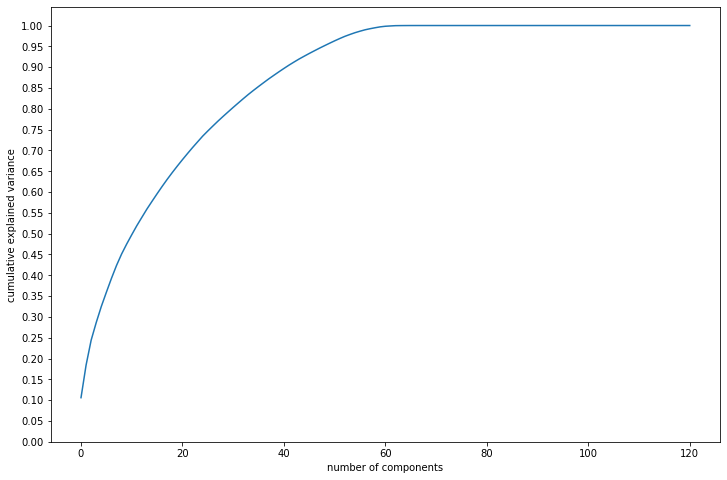

In [115]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

In [116]:
# From above graph we can see that with 40 features we can explain 95% of variance
pca_final = IncrementalPCA(n_components=40)
telecom_train_pca = pca_final.fit_transform(X_train_scaled)
telecom_train_pca.shape

(38584, 40)

In [117]:
#Renaming the PCA columns
pc_columns = []
for x in range(1,41):
    pc_columns.append('PC'+str(x))
    
data_pca_df = pd.DataFrame((telecom_train_pca),columns = pc_columns)

In [118]:
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0.684045,0.022572,0.942434,-2.149968,-0.960596,0.210189,-0.093712,0.415618,-0.651076,0.033238,0.196747,0.669573,0.046212,-0.267648,-0.255842,0.449900,-0.219044,0.297705,0.404256,-0.652669,-1.265223,-0.721588,-0.488231,-0.581530,-0.429500,-0.770936,0.296721,0.145354,-0.157480,0.350236,-0.812198,-0.129240,0.436248,-0.890174,-0.139299,0.447616,-0.000645,0.080648,-1.205101,0.548129
1,0.674798,-1.393604,-1.313659,-1.698596,0.166051,-0.717204,-0.036476,0.488906,-0.428971,1.034420,0.236662,0.713200,-0.079183,0.382508,-0.119867,0.451560,0.143258,0.032356,-0.453856,-0.038481,-0.371462,-0.125145,-0.366872,-0.235796,0.582831,0.343762,-0.168118,-0.103065,-0.145312,0.272801,0.126852,0.135287,0.659320,-0.169343,0.456445,-0.428309,-0.601356,0.737723,0.790874,-0.309318
2,6.403816,3.012082,1.760302,-4.288358,2.231498,3.858293,-3.686345,-2.012101,4.256209,1.849940,-0.008503,-0.809725,-5.284281,3.017833,-3.356204,5.083976,-2.108375,-3.375260,-0.448550,-1.927329,0.526789,-1.184242,-3.331834,-2.053761,1.676826,4.094408,-2.884705,1.452057,-1.877967,-1.442698,-0.063376,-0.582298,0.168199,-1.014820,-2.591060,0.840685,0.326866,-0.331480,0.445153,0.499971
3,-3.582131,1.943724,-1.485149,-0.021418,-1.043582,-0.888685,-0.742062,-1.355666,-2.863696,-1.418700,0.857832,-0.785405,-1.364745,-0.895346,-1.091911,-0.195110,-0.816137,-1.259404,0.349603,-0.029156,-0.264690,-0.537196,0.012414,-0.219224,-0.410042,0.395501,0.013400,-0.119338,-0.136044,0.264631,-0.015001,0.281083,0.258855,0.412111,0.457245,0.264302,0.182827,-0.298371,-0.195573,-0.288584
4,-0.215962,-3.701427,-0.824718,-0.140247,-1.476670,-0.405868,-0.188408,-0.077987,0.111945,-1.004604,-0.259803,0.408844,-0.195580,-0.551576,-0.625524,0.601737,1.075070,0.194675,0.329829,-0.177162,-0.301424,-0.125168,0.035649,0.572335,0.259310,-0.128193,-0.755507,-0.148212,-0.347431,-0.082980,-0.232564,-0.122304,-0.026182,0.155357,0.308269,0.299686,0.139816,-0.131939,-0.035542,-0.183397


In [119]:
data_pca_df.shape

(38584, 40)

In [120]:
#Matching the index
data_pca_df.index = X_train_scaled.index

### Logistic Regression with PCA

#### Model 1

In [121]:
X_lr_pca_1 = sm.add_constant(data_pca_df)
logreg_pca_1 = sm.GLM(y_train,X_lr_pca_1, family= sm.families.Binomial())
logreg_pca_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38543
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15777.
Date:                Tue, 25 May 2021   Deviance:                       31553.
Time:                        00:59:19   Pearson chi2:                 3.53e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1514      0.019     -7.888      0.000      -0.189      -0.114
PC1           -0.6814      0.008    -90.630      0.000      -0.696      -0.667
PC2            0.0866      0.006     15.666      0.000       0.076       0.097
PC3           -0.1249      0.008    -16.166      0.000      -0.140      -0.110
PC4            0.0736      0.010      7.445      0.000       0.054       0.093
PC5            0.1709      0.011     15.438      0.000       0.149       0.193
PC6           -0.2018      0.009    -22.455      0.000      -0.219      -0.184
PC7            0.0248      0.010      2.503      0.012       0.005       0.044
PC8            0.4252      0.014     30.904      0.000       0.398       0.452
PC9            0.0264      0.009      2.833      0.005       0.008       0.045
PC10           0.0240      0.013      1.870      0.061      -0.001       0.049
PC11          -0.0443      0.016     -2.806      0.005      -0.075      -0.013
PC12           0.0799      0.011      7.073      0.000       0.058       0.102
PC13          -0.0763      0.013     -5.902      0.000      -0.102      -0.051
PC14           0.0227      0.014      1.661      0.097      -0.004       0.049
PC15           0.0403      0.014      2.897      0.004       0.013       0.068
PC16           0.0903      0.015      6.176      0.000       0.062       0.119
PC17           0.0373      0.013      2.855      0.004       0.012       0.063
PC18          -0.0253      0.015     -1.720      0.085      -0.054       0.004
PC19          -0.0270      0.014     -1.977      0.048      -0.054      -0.000
PC20           0.0687      0.019      3.624      0.000       0.032       0.106
PC21           0.0517      0.015      3.412      0.001       0.022       0.081
PC22           0.0807      0.019      4.291      0.000       0.044       0.118
PC23          -0.0882      0.020     -4.349      0.000      -0.128      -0.048
PC24           0.0168      0.018      0.955      0.339      -0.018       0.051
PC25           0.1585      0.020      8.113      0.000       0.120       0.197
PC26           0.0970      0.018      5.283      0.000       0.061       0.133
PC27           0.0438      0.017      2.639      0.008       0.011       0.076
PC28          -0.0190      0.022     -0.868      0.385      -0.062       0.024
PC29          -0.1012      0.016     -6.397      0.000      -0.132      -0.070
PC30           0.2200      0.015     14.899      0.000       0.191       0.249
PC31           0.2255      0.019     12.058      0.000       0.189       0.262
PC32          -0.1134      0.019     -5.972      0.000      -0.151      -0.076
PC33          -0.3028      0.024    -12.660      0.000      -0.350      -0.256
PC34           0.2255      0.023      9.821      0.000       0.181       0.271
PC35          -0.3277      0.022    -14.689      0.000      -0.371      -0.284
PC

We can see that some of the P values are greater than **0.05**. Hence we need to start with feature dropping.

In [122]:
# First lets make copy of PCA dataframe
pca_df = data_pca_df.copy()

In [123]:
# Dropping feature with highest P value - PC28
pca_df.drop('PC28',axis = 1,inplace = True)

#### Model 2

In [124]:
X_lr_pca_2 = sm.add_constant(pca_df)
logreg_pca_2 = sm.GLM(y_train,X_lr_pca_2, family= sm.families.Binomial())
logreg_pca_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38544
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15777.
Date:                Tue, 25 May 2021   Deviance:                       31554.
Time:                        00:59:19   Pearson chi2:                 3.80e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1488      0.019     -7.846      0.000      -0.186      -0.112
PC1           -0.6807      0.007    -91.138      0.000      -0.695      -0.666
PC2            0.0866      0.006     15.677      0.000       0.076       0.097
PC3           -0.1240      0.008    -16.223      0.000      -0.139      -0.109
PC4            0.0740      0.010      7.503      0.000       0.055       0.093
PC5            0.1696      0.011     15.504      0.000       0.148       0.191
PC6           -0.2014      0.009    -22.487      0.000      -0.219      -0.184
PC7            0.0258      0.010      2.625      0.009       0.007       0.045
PC8            0.4234      0.014     31.161      0.000       0.397       0.450
PC9            0.0268      0.009      2.889      0.004       0.009       0.045
PC10           0.0255      0.013      2.009      0.045       0.001       0.050
PC11          -0.0435      0.016     -2.766      0.006      -0.074      -0.013
PC12           0.0800      0.011      7.088      0.000       0.058       0.102
PC13          -0.0747      0.013     -5.833      0.000      -0.100      -0.050
PC14           0.0214      0.014      1.577      0.115      -0.005       0.048
PC15           0.0385      0.014      2.803      0.005       0.012       0.065
PC16           0.0898      0.015      6.154      0.000       0.061       0.118
PC17           0.0350      0.013      2.739      0.006       0.010       0.060
PC18          -0.0281      0.014     -1.970      0.049      -0.056      -0.000
PC19          -0.0274      0.014     -2.008      0.045      -0.054      -0.001
PC20           0.0617      0.017      3.591      0.000       0.028       0.095
PC21           0.0550      0.015      3.750      0.000       0.026       0.084
PC22           0.0820      0.019      4.377      0.000       0.045       0.119
PC23          -0.0821      0.019     -4.318      0.000      -0.119      -0.045
PC24           0.0143      0.017      0.822      0.411      -0.020       0.048
PC25           0.1584      0.020      8.119      0.000       0.120       0.197
PC26           0.0944      0.018      5.198      0.000       0.059       0.130
PC27           0.0415      0.016      2.531      0.011       0.009       0.074
PC29          -0.1004      0.016     -6.373      0.000      -0.131      -0.070
PC30           0.2225      0.014     15.348      0.000       0.194       0.251
PC31           0.2248      0.019     12.001      0.000       0.188       0.262
PC32          -0.1191      0.018     -6.696      0.000      -0.154      -0.084
PC33          -0.3027      0.024    -12.650      0.000      -0.350      -0.256
PC34           0.2241      0.023      9.779      0.000       0.179       0.269
PC35          -0.3272      0.022    -14.674      0.000      -0.371      -0.283
PC36          -0.1021      0.021     -4.949      0.000      -0.142      -0.062
PC

In [125]:
# Dropping feature with highest P value - PC24
pca_df.drop('PC24',axis = 1,inplace = True)

#### Model 3

In [126]:
X_lr_pca_3 = sm.add_constant(pca_df)
logreg_pca_3 = sm.GLM(y_train,X_lr_pca_3, family= sm.families.Binomial())
logreg_pca_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38545
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15777.
Date:                Tue, 25 May 2021   Deviance:                       31555.
Time:                        00:59:19   Pearson chi2:                 2.74e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1485      0.019     -7.831      0.000      -0.186      -0.111
PC1           -0.6810      0.007    -91.207      0.000      -0.696      -0.666
PC2            0.0864      0.006     15.661      0.000       0.076       0.097
PC3           -0.1248      0.008    -16.459      0.000      -0.140      -0.110
PC4            0.0753      0.010      7.734      0.000       0.056       0.094
PC5            0.1687      0.011     15.529      0.000       0.147       0.190
PC6           -0.2022      0.009    -22.739      0.000      -0.220      -0.185
PC7            0.0261      0.010      2.663      0.008       0.007       0.045
PC8            0.4253      0.013     31.719      0.000       0.399       0.452
PC9            0.0256      0.009      2.792      0.005       0.008       0.044
PC10           0.0255      0.013      2.007      0.045       0.001       0.050
PC11          -0.0448      0.016     -2.866      0.004      -0.076      -0.014
PC12           0.0789      0.011      7.042      0.000       0.057       0.101
PC13          -0.0739      0.013     -5.798      0.000      -0.099      -0.049
PC14           0.0236      0.013      1.769      0.077      -0.003       0.050
PC15           0.0369      0.014      2.711      0.007       0.010       0.064
PC16           0.0915      0.014      6.346      0.000       0.063       0.120
PC17           0.0366      0.013      2.900      0.004       0.012       0.061
PC18          -0.0260      0.014     -1.850      0.064      -0.054       0.002
PC19          -0.0298      0.013     -2.244      0.025      -0.056      -0.004
PC20           0.0593      0.017      3.521      0.000       0.026       0.092
PC21           0.0531      0.014      3.673      0.000       0.025       0.082
PC22           0.0897      0.016      5.534      0.000       0.058       0.122
PC23          -0.0801      0.019     -4.260      0.000      -0.117      -0.043
PC25           0.1590      0.019      8.194      0.000       0.121       0.197
PC26           0.0954      0.018      5.288      0.000       0.060       0.131
PC27           0.0413      0.016      2.526      0.012       0.009       0.073
PC29          -0.0991      0.016     -6.330      0.000      -0.130      -0.068
PC30           0.2234      0.014     15.454      0.000       0.195       0.252
PC31           0.2237      0.019     12.026      0.000       0.187       0.260
PC32          -0.1174      0.018     -6.650      0.000      -0.152      -0.083
PC33          -0.2990      0.023    -12.751      0.000      -0.345      -0.253
PC34           0.2289      0.022     10.340      0.000       0.186       0.272
PC35          -0.3299      0.022    -15.002      0.000      -0.373      -0.287
PC36          -0.0992      0.020     -4.887      0.000      -0.139      -0.059
PC37           0.0557      0.020      2.731      0.006       0.016       0.096
PC

In [127]:
# Dropping feature with highest P value - PC14
pca_df.drop('PC14',axis = 1,inplace = True)

#### Model 4

In [128]:
X_lr_pca_4 = sm.add_constant(pca_df)
logreg_pca_4 = sm.GLM(y_train,X_lr_pca_4, family= sm.families.Binomial())
logreg_pca_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38546
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15779.
Date:                Tue, 25 May 2021   Deviance:                       31558.
Time:                        00:59:20   Pearson chi2:                 2.77e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1515      0.019     -8.043      0.000      -0.188      -0.115
PC1           -0.6812      0.007    -91.238      0.000      -0.696      -0.667
PC2            0.0871      0.006     15.759      0.000       0.076       0.098
PC3           -0.1227      0.007    -16.427      0.000      -0.137      -0.108
PC4            0.0727      0.010      7.518      0.000       0.054       0.092
PC5            0.1707      0.011     15.682      0.000       0.149       0.192
PC6           -0.2014      0.009    -22.508      0.000      -0.219      -0.184
PC7            0.0262      0.010      2.662      0.008       0.007       0.046
PC8            0.4234      0.013     31.682      0.000       0.397       0.450
PC9            0.0251      0.009      2.728      0.006       0.007       0.043
PC10           0.0250      0.013      1.963      0.050    4.22e-05       0.050
PC11          -0.0439      0.016     -2.796      0.005      -0.075      -0.013
PC12           0.0823      0.011      7.459      0.000       0.061       0.104
PC13          -0.0726      0.013     -5.637      0.000      -0.098      -0.047
PC15           0.0413      0.014      3.035      0.002       0.015       0.068
PC16           0.0902      0.015      6.193      0.000       0.062       0.119
PC17           0.0339      0.013      2.691      0.007       0.009       0.059
PC18          -0.0249      0.014     -1.763      0.078      -0.053       0.003
PC19          -0.0260      0.013     -1.954      0.051      -0.052    7.97e-05
PC20           0.0589      0.017      3.500      0.000       0.026       0.092
PC21           0.0523      0.014      3.608      0.000       0.024       0.081
PC22           0.0881      0.016      5.441      0.000       0.056       0.120
PC23          -0.0724      0.018     -3.939      0.000      -0.108      -0.036
PC25           0.1638      0.019      8.460      0.000       0.126       0.202
PC26           0.0937      0.018      5.164      0.000       0.058       0.129
PC27           0.0399      0.016      2.434      0.015       0.008       0.072
PC29          -0.0982      0.016     -6.297      0.000      -0.129      -0.068
PC30           0.2212      0.014     15.345      0.000       0.193       0.249
PC31           0.2179      0.018     12.117      0.000       0.183       0.253
PC32          -0.1178      0.018     -6.680      0.000      -0.152      -0.083
PC33          -0.2935      0.023    -12.730      0.000      -0.339      -0.248
PC34           0.2316      0.022     10.468      0.000       0.188       0.275
PC35          -0.3272      0.022    -14.843      0.000      -0.370      -0.284
PC36          -0.0944      0.020     -4.656      0.000      -0.134      -0.055
PC37           0.0551      0.020      2.708      0.007       0.015       0.095
PC38          -0.2457      0.020    -12.107      0.000      -0.286      -0.206
PC

In [129]:
# Dropping feature with highest P value - PC18
pca_df.drop('PC18',axis = 1,inplace = True)

#### Model 5

In [130]:
X_lr_pca_5 = sm.add_constant(pca_df)
logreg_pca_5 = sm.GLM(y_train,X_lr_pca_5, family= sm.families.Binomial())
logreg_pca_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38547
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15781.
Date:                Tue, 25 May 2021   Deviance:                       31561.
Time:                        00:59:20   Pearson chi2:                 1.97e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1538      0.019     -8.178      0.000      -0.191      -0.117
PC1           -0.6824      0.007    -91.593      0.000      -0.697      -0.668
PC2            0.0863      0.006     15.648      0.000       0.075       0.097
PC3           -0.1242      0.007    -16.707      0.000      -0.139      -0.110
PC4            0.0737      0.010      7.611      0.000       0.055       0.093
PC5            0.1711      0.011     15.677      0.000       0.150       0.193
PC6           -0.2033      0.009    -22.810      0.000      -0.221      -0.186
PC7            0.0266      0.010      2.713      0.007       0.007       0.046
PC8            0.4249      0.013     31.845      0.000       0.399       0.451
PC9            0.0256      0.009      2.775      0.006       0.008       0.044
PC10           0.0242      0.013      1.897      0.058      -0.001       0.049
PC11          -0.0442      0.016     -2.792      0.005      -0.075      -0.013
PC12           0.0824      0.011      7.461      0.000       0.061       0.104
PC13          -0.0688      0.013     -5.349      0.000      -0.094      -0.044
PC15           0.0429      0.014      3.126      0.002       0.016       0.070
PC16           0.0897      0.015      6.091      0.000       0.061       0.119
PC17           0.0349      0.013      2.775      0.006       0.010       0.060
PC19          -0.0259      0.013     -1.947      0.052      -0.052       0.000
PC20           0.0623      0.017      3.711      0.000       0.029       0.095
PC21           0.0523      0.015      3.600      0.000       0.024       0.081
PC22           0.0883      0.016      5.439      0.000       0.056       0.120
PC23          -0.0662      0.018     -3.626      0.000      -0.102      -0.030
PC25           0.1627      0.020      8.304      0.000       0.124       0.201
PC26           0.0892      0.018      4.952      0.000       0.054       0.125
PC27           0.0433      0.016      2.652      0.008       0.011       0.075
PC29          -0.0953      0.016     -6.133      0.000      -0.126      -0.065
PC30           0.2186      0.014     15.232      0.000       0.190       0.247
PC31           0.2157      0.018     11.969      0.000       0.180       0.251
PC32          -0.1117      0.017     -6.441      0.000      -0.146      -0.078
PC33          -0.2915      0.023    -12.609      0.000      -0.337      -0.246
PC34           0.2410      0.022     11.153      0.000       0.199       0.283
PC35          -0.3249      0.022    -14.732      0.000      -0.368      -0.282
PC36          -0.0969      0.020     -4.776      0.000      -0.137      -0.057
PC37           0.0602      0.020      2.981      0.003       0.021       0.100
PC38          -0.2502      0.020    -12.408      0.000      -0.290      -0.211
PC39          -0.1091      0.019     -5.681      0.000      -0.147      -0.071
PC

In [131]:
# Dropping feature with highest P value - PC10
pca_df.drop('PC10',axis = 1,inplace = True)

#### Model 6

In [132]:
X_lr_pca_6 = sm.add_constant(pca_df)
logreg_pca_6 = sm.GLM(y_train,X_lr_pca_6, family= sm.families.Binomial())
logreg_pca_6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38548
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15782.
Date:                Tue, 25 May 2021   Deviance:                       31565.
Time:                        00:59:21   Pearson chi2:                 2.02e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1606      0.018     -8.716      0.000      -0.197      -0.125
PC1           -0.6826      0.007    -91.714      0.000      -0.697      -0.668
PC2            0.0873      0.005     15.885      0.000       0.077       0.098
PC3           -0.1238      0.007    -16.684      0.000      -0.138      -0.109
PC4            0.0678      0.009      7.360      0.000       0.050       0.086
PC5            0.1755      0.011     16.267      0.000       0.154       0.197
PC6           -0.2047      0.009    -22.990      0.000      -0.222      -0.187
PC7            0.0239      0.010      2.442      0.015       0.005       0.043
PC8            0.4242      0.013     31.785      0.000       0.398       0.450
PC9            0.0280      0.009      3.052      0.002       0.010       0.046
PC11          -0.0413      0.016     -2.595      0.009      -0.073      -0.010
PC12           0.0804      0.011      7.322      0.000       0.059       0.102
PC13          -0.0679      0.013     -5.296      0.000      -0.093      -0.043
PC15           0.0428      0.014      3.147      0.002       0.016       0.069
PC16           0.0878      0.015      5.990      0.000       0.059       0.117
PC17           0.0390      0.012      3.142      0.002       0.015       0.063
PC19          -0.0235      0.013     -1.777      0.076      -0.049       0.002
PC20           0.0582      0.017      3.501      0.000       0.026       0.091
PC21           0.0536      0.015      3.696      0.000       0.025       0.082
PC22           0.0902      0.016      5.569      0.000       0.058       0.122
PC23          -0.0634      0.018     -3.495      0.000      -0.099      -0.028
PC25           0.1579      0.019      8.141      0.000       0.120       0.196
PC26           0.0882      0.018      4.925      0.000       0.053       0.123
PC27           0.0420      0.016      2.585      0.010       0.010       0.074
PC29          -0.0998      0.015     -6.449      0.000      -0.130      -0.069
PC30           0.2158      0.014     15.140      0.000       0.188       0.244
PC31           0.2122      0.018     11.834      0.000       0.177       0.247
PC32          -0.1109      0.017     -6.403      0.000      -0.145      -0.077
PC33          -0.2839      0.023    -12.531      0.000      -0.328      -0.240
PC34           0.2392      0.022     11.108      0.000       0.197       0.281
PC35          -0.3235      0.022    -14.765      0.000      -0.366      -0.281
PC36          -0.0995      0.020     -4.948      0.000      -0.139      -0.060
PC37           0.0567      0.020      2.833      0.005       0.017       0.096
PC38          -0.2479      0.020    -12.373      0.000      -0.287      -0.209
PC39          -0.1100      0.019     -5.748      0.000      -0.147      -0.072
PC40           0.1444      0.023      6.222      0.000       0.099       0.190
==

In [133]:
# Dropping feature with highest P value - PC19
pca_df.drop('PC19',axis = 1,inplace = True)

#### Model 7

In [134]:
X_lr_pca_7 = sm.add_constant(pca_df)
logreg_pca_7 = sm.GLM(y_train,X_lr_pca_7, family= sm.families.Binomial())
logreg_pca_7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38549
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15784.
Date:                Tue, 25 May 2021   Deviance:                       31568.
Time:                        00:59:21   Pearson chi2:                 1.96e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1645      0.018     -8.990      0.000      -0.200      -0.129
PC1           -0.6833      0.007    -91.856      0.000      -0.698      -0.669
PC2            0.0876      0.005     15.946      0.000       0.077       0.098
PC3           -0.1249      0.007    -16.869      0.000      -0.139      -0.110
PC4            0.0665      0.009      7.233      0.000       0.048       0.085
PC5            0.1772      0.011     16.436      0.000       0.156       0.198
PC6           -0.2043      0.009    -22.859      0.000      -0.222      -0.187
PC7            0.0232      0.010      2.388      0.017       0.004       0.042
PC8            0.4238      0.013     31.772      0.000       0.398       0.450
PC9            0.0283      0.009      3.084      0.002       0.010       0.046
PC11          -0.0391      0.016     -2.451      0.014      -0.070      -0.008
PC12           0.0820      0.011      7.487      0.000       0.060       0.103
PC13          -0.0689      0.013     -5.430      0.000      -0.094      -0.044
PC15           0.0457      0.013      3.387      0.001       0.019       0.072
PC16           0.0893      0.015      6.098      0.000       0.061       0.118
PC17           0.0362      0.012      2.938      0.003       0.012       0.060
PC20           0.0594      0.017      3.566      0.000       0.027       0.092
PC21           0.0520      0.015      3.578      0.000       0.024       0.080
PC22           0.0880      0.016      5.447      0.000       0.056       0.120
PC23          -0.0568      0.018     -3.186      0.001      -0.092      -0.022
PC25           0.1607      0.020      8.143      0.000       0.122       0.199
PC26           0.0882      0.018      4.905      0.000       0.053       0.124
PC27           0.0412      0.016      2.533      0.011       0.009       0.073
PC29          -0.1002      0.015     -6.472      0.000      -0.131      -0.070
PC30           0.2150      0.014     15.094      0.000       0.187       0.243
PC31           0.2128      0.018     11.734      0.000       0.177       0.248
PC32          -0.1122      0.017     -6.483      0.000      -0.146      -0.078
PC33          -0.2816      0.023    -12.463      0.000      -0.326      -0.237
PC34           0.2362      0.021     10.999      0.000       0.194       0.278
PC35          -0.3225      0.022    -14.643      0.000      -0.366      -0.279
PC36          -0.0986      0.020     -4.870      0.000      -0.138      -0.059
PC37           0.0527      0.020      2.649      0.008       0.014       0.092
PC38          -0.2444      0.020    -12.213      0.000      -0.284      -0.205
PC39          -0.1118      0.019     -5.840      0.000      -0.149      -0.074
PC40           0.1377      0.023      6.064      0.000       0.093       0.182
==============================================================================
""

Now we can see that none of the PCA components have P-value > 0.05.
Although PCA creates uncorrelated components but lets do a VIF check to confirm this

#### VIF

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_lr_pca_7.columns
vif['VIF'] = [variance_inflation_factor(X_lr_pca_7.values, i) for i in range(X_lr_pca_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.0
26,PC32,1.0
20,PC25,1.0
21,PC26,1.0
22,PC27,1.0
23,PC29,1.0
24,PC30,1.0
25,PC31,1.0
27,PC33,1.0
18,PC22,1.0


#### Making Predictionsv- Train data

In [136]:
# Making Predictions on training data

y_train_pred = logreg_pca_7.fit().predict(X_lr_pca_7)

In [137]:
# Checking the predicted dataframe
y_train_pred.head()

15406    0.204586
25289    0.328469
26422    0.011579
1173     0.847862
19065    0.385853
dtype: float64

In [138]:
# Checking the actual Target feature 
y_train.head()

15406    0
25289    0
26422    0
1173     1
19065    0
Name: churn, dtype: int64

In [139]:
#Merging the actual & predicted dataframes

y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

y_train_pred_final.head()

,index,churn,churn_prob
0,15406,0,0.204586
1,25289,0,0.328469
2,26422,0,0.011579
3,1173,1,0.847862
4,19065,0,0.385853


#### ROC Curve

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, 
                                         drop_intermediate = False )


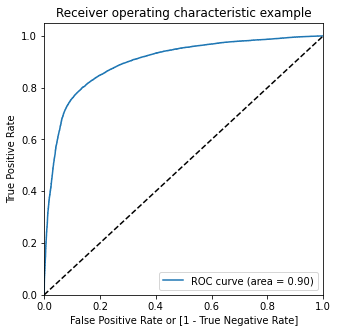

In [142]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

So, we have got AUC = 90, which is quiet good.

#### Optimal CutOff point

In [143]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,15406,0,0.204586,1,1,1,0,0,0,0,0,0,0
1,25289,0,0.328469,1,1,1,1,0,0,0,0,0,0
2,26422,0,0.011579,1,0,0,0,0,0,0,0,0,0
3,1173,1,0.847862,1,1,1,1,1,1,1,1,1,0
4,19065,0,0.385853,1,1,1,1,0,0,0,0,0,0


In [144]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.500000  1.000000  0.000000  0.500000
0.1   0.1  0.665639  0.974912  0.356365  0.602338
0.2   0.2  0.735590  0.950394  0.520786  0.664793
0.3   0.3  0.782578  0.919863  0.645293  0.721705
0.4   0.4  0.811865  0.881764  0.741966  0.773614
0.5   0.5  0.828374  0.829204  0.827545  0.827831
0.6   0.6  0.830888  0.771719  0.890058  0.875301
0.7   0.7  0.814405  0.697802  0.931008  0.910025
0.8   0.8  0.751218  0.541105  0.961331  0.933304
0.9   0.9  0.658667  0.331847  0.985486  0.958096


<Figure size 720x720 with 0 Axes>

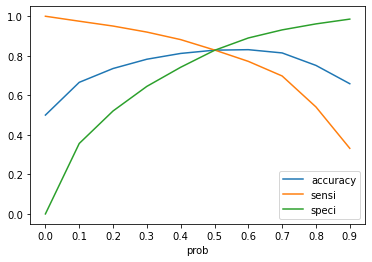

In [145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.1))
plt.show()

From the curve above, **0.52** is the optimum point to take it as a cutoff probability.

In [146]:
# Mapping the Churn based on Optimal point 0.52
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,15406,0,0.204586,1,1,1,0,0,0,0,0,0,0,0
1,25289,0,0.328469,1,1,1,1,0,0,0,0,0,0,0
2,26422,0,0.011579,1,0,0,0,0,0,0,0,0,0,0
3,1173,1,0.847862,1,1,1,1,1,1,1,1,1,0,1
4,19065,0,0.385853,1,1,1,1,0,0,0,0,0,0,0


#### Evaluation - Train data

##### Accuracy

In [147]:
# Let's check the overall Accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8303701015965167

##### Confusion Matrix

In [148]:
# Creating Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16249,  3043],
       [ 3502, 15790]])

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity, Specificity and Precision

In [150]:
# Let's see the sensitivity of our logistic regression model (with PCA)
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8184739788513373
Specificity: 0.8422662243416961
Precision: 0.8384219189720172


#### Making Prediction - Test

In [151]:
telecom_test_pca = pca_final.transform(X_test_scaled)

test_pc_df = pd.DataFrame((telecom_test_pca),columns = pc_columns)

test_pc_df.index = X_test_scaled.index

In [152]:
test_pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
4710,4.358371,0.170497,3.863375,0.282789,-0.754962,0.203772,-1.515053,-0.387118,0.246955,-1.017608,-0.504485,-0.675711,0.190333,-0.115334,1.354316,0.043787,0.986333,-0.465704,0.225666,0.545091,-0.685829,-0.047922,0.530442,-0.594377,-0.466753,0.282861,-1.172293,-0.303271,-0.173403,-0.029245,1.047011,0.125618,0.955491,-0.498671,-0.885292,-0.506833,0.199871,-0.409669,1.203695,0.174892
8970,2.143918,-1.535894,2.525560,1.441674,0.275452,-1.756491,-1.615941,-0.120097,0.158586,-0.923127,-0.740921,-1.828659,0.118054,0.227616,0.732826,-0.534226,0.955074,0.416031,0.271933,0.561700,-0.496228,0.297997,0.689239,-0.109719,0.615506,-0.026120,-0.262085,-0.291152,-0.604875,-0.151482,-1.564237,-0.064377,-0.334399,-0.761958,0.465517,-0.650334,0.506509,-0.502435,-0.061380,0.467086
27111,0.516335,-2.471270,-1.560563,-0.669473,-0.530264,0.509018,0.697167,-0.525226,-0.878385,0.366283,-1.609241,0.979248,0.070429,0.024979,-0.135670,0.518820,-0.301939,0.067349,-0.525276,0.216970,-0.645600,-0.208582,-0.126876,-0.057654,0.613954,0.244332,0.010253,0.360964,-0.361986,-0.190175,0.197700,0.288347,0.264282,0.238281,0.647550,0.087877,-0.347521,0.606593,0.693680,-0.226993
44126,-3.903747,3.383867,10.811105,-3.375087,-4.676549,1.475953,5.752106,9.553564,0.879837,0.688702,-2.115068,2.009631,-0.503587,-5.674623,4.774554,-3.386822,2.880352,-3.190342,-2.209498,-3.785366,0.056098,0.479596,-7.903560,1.395569,1.700717,4.909461,1.520997,1.260301,-3.105400,-1.175855,-5.768311,3.526757,0.638586,6.744090,-1.576305,0.877652,1.603283,-1.333597,1.754191,0.389967
50828,0.809217,1.119868,3.151374,-2.056940,-0.672150,0.802750,-0.369312,1.101146,-1.027925,0.138632,-0.126807,0.548557,0.298100,-0.256766,0.250175,0.504924,-0.159584,0.436108,0.006658,0.414575,-0.108328,0.459147,0.111561,-0.689691,-0.468506,-1.463445,0.984535,-0.443153,-0.066345,0.247390,-0.376787,0.175599,0.197914,-1.084128,-0.319364,0.785333,-0.011568,-0.131792,-0.092135,0.374245


In [153]:
## Adding constanct and predicting

X_test_pca_lr = sm.add_constant(test_pc_df[pca_df.columns.tolist()])
y_test_pred = logreg_pca_7.fit().predict(X_test_pca_lr)

In [154]:
#Checking the predicted df
y_test_pred.head()

4710     0.020361
8970     0.125998
27111    0.220594
44126    0.997933
50828    0.219711
dtype: float64

In [155]:
#Checking a actual target variable

y_test.head()

4710     0
8970     0
27111    0
44126    1
50828    1
Name: churn, dtype: int64

In [156]:
#Merging the actual & predicted dataframes

y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),
                                            on = 'index')
y_test_pred_final.head()

,index,churn,churn_prob
0,4710,0,0.020361
1,8970,0,0.125998
2,27111,0,0.220594
3,44126,1,0.997933
4,50828,1,0.219711


In [157]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,4710,0,0.020361,0
1,8970,0,0.125998,0
2,27111,0,0.220594,0
3,44126,1,0.997933,1
4,50828,1,0.219711,0


#### Evaluation - Test data

##### Accuracy

In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8288582486695695

We got similar Accuracy as our Training data.

##### Confusion Matrix

In [159]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[6944, 1324],
       [1506, 6762]])

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity, Specificity and Precision

In [161]:
# Let's see the sensitivity of our logistic regression model (with PCA)
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8178519593613933
Specificity: 0.8398645379777455
Precision: 0.8362602028196884


Train data Metrics:
- Sensitivity: 0.8184739788513373
- Specificity: 0.8422662243416961
- Precision: 0.8384219189720172

We can see that prediction on the test data have yielded similar results as train data, which indicates that our model is Robust and not overfitting.

### Random Forest with PCA

In [162]:
# Creating instance of Random Forest Classifier and Fitting the test data
rfc = RandomForestClassifier()
rfc.fit(data_pca_df,y_train)

RandomForestClassifier()

#### Prediction - Train data

In [163]:
# Making predictions of Train data

y_train_pred = rfc.predict(data_pca_df)

In [164]:
#Checking the predicted series
y_train_pred

array([0, 0, 0, ..., 1, 0, 0])

In [165]:
#Priting Classification Report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19292
           1       1.00      1.00      1.00     19292

    accuracy                           1.00     38584
   macro avg       1.00      1.00      1.00     38584
weighted avg       1.00      1.00      1.00     38584



#### Confusion Matrix

In [166]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred))

[[19291     1]
 [    0 19292]]


#### Accuracy - Train

In [167]:
#printing Accuracy
print(accuracy_score(y_train,y_train_pred))

0.9999740825212523


We have got 100% accuracy, lets see if this is overfitting model.

#### Prediction - Test data

In [168]:
# Making prediction on Test dataset
y_test_pred = rfc.predict(test_pc_df)

In [169]:
#Priting Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8268
           1       0.93      0.95      0.94      8268

    accuracy                           0.94     16536
   macro avg       0.94      0.94      0.94     16536
weighted avg       0.94      0.94      0.94     16536



#### Confusion Matrix

In [170]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[7712  556]
 [ 400 7868]]


#### Accuracy - Test

In [171]:
print(accuracy_score(y_test,y_test_pred))

0.9421867440735365


We have got accuracy of 94% on Test set, which is very good and also shows model is not overfitting.

### Random Forest with Hyperparameter tuning 

#### Grid Search

In [172]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [500,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [173]:
# Fit the grid search to the data
grid_search.fit(data_pca_df,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [500, 1000]},
             verbose=1)

#### Best Parameters

In [174]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9293748615856509 using {'max_depth': 20, 'n_estimators': 500}


In [175]:
#Lets use the Optimal parameters to build the final model
rfc_final = RandomForestClassifier(n_estimators = 1000,max_depth = 20,bootstrap = True,random_state = 12)

In [176]:
#Fitting the data
rfc_final.fit(data_pca_df,y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=12)

#### Predictions - Train data

In [177]:
# Making predictions on Training set
y_train_pred = rfc_final.predict(data_pca_df)

In [178]:
#Priting Classification Report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19292
           1       0.98      1.00      0.99     19292

    accuracy                           0.99     38584
   macro avg       0.99      0.99      0.99     38584
weighted avg       0.99      0.99      0.99     38584



#### Confusion Matrix

In [179]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred))

[[18998   294]
 [    0 19292]]


#### Accuracy - Train

In [180]:
print(accuracy_score(y_train,y_train_pred))

0.9923802612481858


We have got a 99% Accuracy on Training data.

#### Prediction - Test data

In [181]:
#Making predictions on test dataset
y_test_pred = rfc_final.predict(test_pc_df)

In [182]:
#Priting Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8268
           1       0.93      0.95      0.94      8268

    accuracy                           0.94     16536
   macro avg       0.94      0.94      0.94     16536
weighted avg       0.94      0.94      0.94     16536



#### Confusion Matrix

In [183]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[7676  592]
 [ 392 7876]]


#### Accuracy - Test data

In [184]:
# Accuracy obtained for Test dataset
print(accuracy_score(y_test,y_test_pred))

0.9404934687953556


We can see that Accuracy obtained on Test data is good, not too far from what we got for Train dataset, which indicates that model is not overfitting.

**Train Accuracy: 0.9923802612481858**

### Extracting Feature contributing to CHURN

#### Feature selection using RFE

In [185]:
#Instantiating the model
lr_rfe = LogisticRegression()

In [186]:
# Selecting top 20 featues to start with

rfe20 = RFE(lr_rfe, 20)             
rfe20 = rfe20.fit(X_train_scaled, y_train)

In [187]:
# printing list of 20 columns
print('Selected columns from RFE:')
print(X_train_scaled.columns[rfe20.support_].tolist())

Selected columns from RFE:
['std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'is_rech_8', 'av_arpu_6_7', 'av_total_rech_num_6_7', 'av_total_rech_amt_6_7', 'av_max_rech_amt_6_7', 'av_last_day_rch_amt_6_7', 'av_av_rech_amt_data_6_7', 'diff_total_ic_mou', 'diff_total_rech_num', 'diff_total_rech_amt', 'diff_max_rech_amt', 'diff_last_day_rch_amt']


#### Building model on top 20 features

In [188]:
# Creating column list of 20 features
cols = X_train_scaled.columns[rfe20.support_].tolist()

In [189]:
X_model20 = sm.add_constant(X_train_scaled[cols])
logmodel20 = sm.GLM(y_train,X_model20,family = sm.families.Binomial())
logmodel20.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4964.6
Date:                Tue, 25 May 2021   Deviance:                       9929.2
Time:                        01:16:57   Pearson chi2:                 1.41e+08
No. Iterations:                    83                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.272e+04   1.86e+05      0.230      0.818   -3.22e+05    4.07e+05
std_og_mou_8                0.7292      0.183      3.974      0.000       0.370       1.089
total_og_mou_8             -1.4035      0.214     -6.572      0.000      -1.822      -0.985
loc_ic_mou_8               -2.4158      0.128    -18.840      0.000      -2.667      -2.164
total_rech_num_8        -1.825e+06    8.5e+06     -0.215      0.830   -1.85e+07    1.48e+07
total_rech_amt_8        -1.382e+06   3.68e+08     -0.004      0.997   -7.23e+08     7.2e+08
max_rech_amt_8          -1.741e+04    2.7e+07     -0.001      0.999    -5.3e+07     5.3e+07
last_day_rch_amt_8      -1.786e+05    8.6e+07     -0.002      0.998   -1.69e+08    1.68e+08
total_rech_data_8          -0.9790      0.075    -13.076      0.000      -1.126      -0.832
is_rech_8                  -0.4806      0.034    -14.000      0.000      -0.548      -0.413
av_arpu_6_7                 0.3537      0.121      2.921      0.003       0.116       0.591
av_total_rech_num_6_7    1.841e+06   8.57e+06      0.215      0.830    -1.5e+07    1.86e+07
av_total_rech_amt_6_7    1.251e+06   3.33e+08      0.004      0.997   -6.51e+08    6.54e+08
av_max_rech_amt_6_7      1.559e+04   2.42e+07      0.001      0.999   -4.74e+07    4.75e+07
av_last_day_rch_amt_6_7  1.461e+05   7.03e+07      0.002      0.998   -1.38e+08    1.38e+08
av_av_rech_amt_data_6_7    -0.1130      0.030     -3.727      0.000      -0.172      -0.054
diff_total_ic_mou           0.2983      0.036      8.291      0.000       0.228       0.369
diff_total_rech_num     -1.709e+06   7.96e+06     -0.215      0.830   -1.73e+07    1.39e+07
diff_total_rech_amt     -1.299e+06   3.46e+08     -0.004      0.997   -6.79e+08    6.77e+08
diff_max_rech_amt       -1.511e+04   2.35e+07     -0.001      0.999    -4.6e+07     4.6e+07
diff_last_day_rch_amt   -1.825e+05   8.79e+07     -0.002      0.998   -1.72e+08    1.72e+08
===========================================================================================
"""

We can see some very high p-value, which needs to be dropped.

#### Rebuilding with 19 features

In [190]:
# Dropping feature with highest P value - max_rech_amt_8
cols.remove('max_rech_amt_8')

In [191]:
X_model19 = sm.add_constant(X_train_scaled[cols])
logmodel19 = sm.GLM(y_train,X_model19,family = sm.families.Binomial())
logmodel19.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38564
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4965.4
Date:                Tue, 25 May 2021   Deviance:                       9930.7
Time:                        01:16:58   Pearson chi2:                 1.42e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.465e+04    1.9e+05      0.235      0.814   -3.28e+05    4.17e+05
std_og_mou_8                0.7292      0.183      3.974      0.000       0.370       1.089
total_og_mou_8             -1.4035      0.214     -6.573      0.000      -1.822      -0.985
loc_ic_mou_8               -2.4160      0.128    -18.842      0.000      -2.667      -2.165
total_rech_num_8        -1.867e+06   9.13e+06     -0.205      0.838   -1.98e+07     1.6e+07
total_rech_amt_8        -4.975e+06   5.78e+08     -0.009      0.993   -1.14e+09    1.13e+09
last_day_rch_amt_8      -1.808e+05   9.61e+07     -0.002      0.998   -1.89e+08    1.88e+08
total_rech_data_8          -0.9793      0.075    -13.078      0.000      -1.126      -0.833
is_rech_8                  -0.4805      0.034    -13.998      0.000      -0.548      -0.413
av_arpu_6_7                 0.3539      0.121      2.923      0.003       0.117       0.591
av_total_rech_num_6_7    1.883e+06   9.21e+06      0.205      0.838   -1.62e+07    1.99e+07
av_total_rech_amt_6_7    4.501e+06   5.23e+08      0.009      0.993   -1.02e+09    1.03e+09
av_max_rech_amt_6_7        -0.1949      0.066     -2.934      0.003      -0.325      -0.065
av_last_day_rch_amt_6_7  1.479e+05   7.87e+07      0.002      0.998   -1.54e+08    1.54e+08
av_av_rech_amt_data_6_7    -0.1132      0.030     -3.736      0.000      -0.173      -0.054
diff_total_ic_mou           0.2981      0.036      8.284      0.000       0.228       0.369
diff_total_rech_num     -1.749e+06   8.55e+06     -0.205      0.838   -1.85e+07     1.5e+07
diff_total_rech_amt     -4.677e+06   5.43e+08     -0.009      0.993   -1.07e+09    1.06e+09
diff_max_rech_amt           0.3056      0.059      5.164      0.000       0.190       0.422
diff_last_day_rch_amt   -1.848e+05   9.83e+07     -0.002      0.998   -1.93e+08    1.92e+08
===========================================================================================
"""

#### Rebuilding with 18 features

In [192]:
# Dropping feature with highest P value - last_day_rch_amt_8
cols.remove('last_day_rch_amt_8')

In [193]:
X_model18 = sm.add_constant(X_train_scaled[cols])
logmodel18 = sm.GLM(y_train,X_model18,family = sm.families.Binomial())
logmodel18.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38565
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4991.3
Date:                Tue, 25 May 2021   Deviance:                       9982.6
Time:                        01:16:59   Pearson chi2:                 1.47e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.454e+04    1.9e+05      0.235      0.814   -3.27e+05    4.16e+05
std_og_mou_8                0.7410      0.184      4.029      0.000       0.381       1.101
total_og_mou_8             -1.4217      0.214     -6.649      0.000      -1.841      -1.003
loc_ic_mou_8               -2.4423      0.129    -19.004      0.000      -2.694      -2.190
total_rech_num_8        -1.867e+06   9.06e+06     -0.206      0.837   -1.96e+07    1.59e+07
total_rech_amt_8        -4.974e+06   5.67e+08     -0.009      0.993   -1.12e+09    1.11e+09
total_rech_data_8          -0.9705      0.074    -13.082      0.000      -1.116      -0.825
is_rech_8                  -0.4807      0.034    -14.008      0.000      -0.548      -0.413
av_arpu_6_7                 0.3597      0.118      3.042      0.002       0.128       0.592
av_total_rech_num_6_7    1.884e+06   9.14e+06      0.206      0.837    -1.6e+07    1.98e+07
av_total_rech_amt_6_7      4.5e+06   5.13e+08      0.009      0.993      -1e+09    1.01e+09
av_max_rech_amt_6_7        -0.1801      0.065     -2.759      0.006      -0.308      -0.052
av_last_day_rch_amt_6_7    -0.3471      0.058     -6.010      0.000      -0.460      -0.234
av_av_rech_amt_data_6_7    -0.1044      0.030     -3.529      0.000      -0.162      -0.046
diff_total_ic_mou           0.2978      0.036      8.286      0.000       0.227       0.368
diff_total_rech_num     -1.749e+06   8.49e+06     -0.206      0.837   -1.84e+07    1.49e+07
diff_total_rech_amt     -4.675e+06   5.33e+08     -0.009      0.993   -1.05e+09    1.04e+09
diff_max_rech_amt           0.2972      0.058      5.112      0.000       0.183       0.411
diff_last_day_rch_amt       0.3509      0.058      6.092      0.000       0.238       0.464
===========================================================================================
"""

#### Rebuilding with 17 features

In [194]:
# Dropping feature with highest P value - total_rech_amt_8
cols.remove('total_rech_amt_8')

In [195]:
X_model17 = sm.add_constant(X_train_scaled[cols])
logmodel17 = sm.GLM(y_train,X_model17,family = sm.families.Binomial())
logmodel17.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6379.6
Date:                Tue, 25 May 2021   Deviance:                       12759.
Time:                        01:17:01   Pearson chi2:                 1.30e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.262e+04   1.83e+05      0.233      0.816   -3.16e+05    4.01e+05
std_og_mou_8                0.8522      0.149      5.734      0.000       0.561       1.143
total_og_mou_8             -1.4185      0.175     -8.123      0.000      -1.761      -1.076
loc_ic_mou_8               -2.1673      0.102    -21.281      0.000      -2.367      -1.968
total_rech_num_8        -1.842e+06    7.9e+06     -0.233      0.816   -1.73e+07    1.37e+07
total_rech_data_8          -1.0061      0.066    -15.293      0.000      -1.135      -0.877
is_rech_8                  -0.3994      0.034    -11.915      0.000      -0.465      -0.334
av_arpu_6_7                 0.4434      0.099      4.488      0.000       0.250       0.637
av_total_rech_num_6_7    1.858e+06   7.97e+06      0.233      0.816   -1.38e+07    1.75e+07
av_total_rech_amt_6_7      -0.1318      0.102     -1.287      0.198      -0.332       0.069
av_max_rech_amt_6_7        -0.0171      0.048     -0.354      0.723      -0.112       0.077
av_last_day_rch_amt_6_7    -0.3013      0.045     -6.769      0.000      -0.389      -0.214
av_av_rech_amt_data_6_7    -0.1578      0.027     -5.914      0.000      -0.210      -0.106
diff_total_ic_mou           0.3094      0.033      9.494      0.000       0.246       0.373
diff_total_rech_num     -1.726e+06    7.4e+06     -0.233      0.816   -1.62e+07    1.28e+07
diff_total_rech_amt         0.2064      0.070      2.931      0.003       0.068       0.344
diff_max_rech_amt           0.0376      0.043      0.873      0.382      -0.047       0.122
diff_last_day_rch_amt       0.3330      0.042      7.954      0.000       0.251       0.415
===========================================================================================
"""

#### Rebuilding with 16 features

In [196]:
# Dropping feature with highest P value - total_rech_num_8
cols.remove('total_rech_num_8')

In [197]:
X_model16 = sm.add_constant(X_train_scaled[cols])
logmodel16 = sm.GLM(y_train,X_model16,family = sm.families.Binomial())
logmodel16.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38567
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16211.
Date:                Tue, 25 May 2021   Deviance:                       32422.
Time:                        01:17:01   Pearson chi2:                 3.44e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1981      0.018    -10.827      0.000      -0.234      -0.162
std_og_mou_8                0.9274      0.068     13.686      0.000       0.795       1.060
total_og_mou_8             -1.3873      0.081    -17.225      0.000      -1.545      -1.229
loc_ic_mou_8               -1.4138      0.044    -32.404      0.000      -1.499      -1.328
total_rech_data_8          -0.6660      0.026    -25.135      0.000      -0.718      -0.614
is_rech_8                  -0.6219      0.028    -22.560      0.000      -0.676      -0.568
av_arpu_6_7                 0.3911      0.081      4.853      0.000       0.233       0.549
av_total_rech_num_6_7      -0.1794      0.024     -7.474      0.000      -0.226      -0.132
av_total_rech_amt_6_7       0.0210      0.086      0.245      0.806      -0.147       0.189
av_max_rech_amt_6_7         0.1204      0.028      4.265      0.000       0.065       0.176
av_last_day_rch_amt_6_7    -0.3872      0.028    -14.048      0.000      -0.441      -0.333
av_av_rech_amt_data_6_7    -0.1758      0.016    -10.665      0.000      -0.208      -0.143
diff_total_ic_mou           0.3089      0.024     12.776      0.000       0.261       0.356
diff_total_rech_num         0.4421      0.029     15.017      0.000       0.384       0.500
diff_total_rech_amt         0.1134      0.033      3.472      0.001       0.049       0.177
diff_max_rech_amt          -0.0652      0.024     -2.689      0.007      -0.113      -0.018
diff_last_day_rch_amt       0.4359      0.024     18.498      0.000       0.390       0.482
===========================================================================================
"""

#### Rebuilding with 15 features

In [198]:
# Dropping feature with highest P value - av_total_rech_amt_6_7
cols.remove('av_total_rech_amt_6_7')

In [199]:
X_model15 = sm.add_constant(X_train_scaled[cols])
logmodel15 = sm.GLM(y_train,X_model15,family = sm.families.Binomial())
logmodel15.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16211.
Date:                Tue, 25 May 2021   Deviance:                       32422.
Time:                        01:17:01   Pearson chi2:                 3.43e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1979      0.018    -10.828      0.000      -0.234      -0.162
std_og_mou_8                0.9262      0.068     13.707      0.000       0.794       1.059
total_og_mou_8             -1.3851      0.080    -17.317      0.000      -1.542      -1.228
loc_ic_mou_8               -1.4141      0.044    -32.424      0.000      -1.500      -1.329
total_rech_data_8          -0.6656      0.026    -25.155      0.000      -0.718      -0.614
is_rech_8                  -0.6217      0.028    -22.559      0.000      -0.676      -0.568
av_arpu_6_7                 0.4097      0.027     15.040      0.000       0.356       0.463
av_total_rech_num_6_7      -0.1789      0.024     -7.484      0.000      -0.226      -0.132
av_max_rech_amt_6_7         0.1217      0.028      4.393      0.000       0.067       0.176
av_last_day_rch_amt_6_7    -0.3864      0.027    -14.111      0.000      -0.440      -0.333
av_av_rech_amt_data_6_7    -0.1765      0.016    -10.846      0.000      -0.208      -0.145
diff_total_ic_mou           0.3086      0.024     12.782      0.000       0.261       0.356
diff_total_rech_num         0.4416      0.029     15.033      0.000       0.384       0.499
diff_total_rech_amt         0.1154      0.032      3.653      0.000       0.053       0.177
diff_max_rech_amt          -0.0652      0.024     -2.689      0.007      -0.113      -0.018
diff_last_day_rch_amt       0.4357      0.024     18.511      0.000       0.390       0.482
===========================================================================================
"""

#### VIF check

In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_og_mou_8,6.95
0,std_og_mou_8,5.61
12,diff_total_rech_amt,4.07
7,av_max_rech_amt_6_7,3.74
8,av_last_day_rch_amt_6_7,3.29
5,av_arpu_6_7,3.01
11,diff_total_rech_num,2.98
13,diff_max_rech_amt,2.78
6,av_total_rech_num_6_7,2.52
14,diff_last_day_rch_amt,2.32


We can see that some features have VIF > 5, these needs to be dropped.

#### Rebuilding with 14 features

In [201]:
# Dropping feature with highest VIF
cols.remove('total_og_mou_8')

In [202]:
X_model14 = sm.add_constant(X_train_scaled[cols])
logmodel14 = sm.GLM(y_train,X_model14,family = sm.families.Binomial())
logmodel14.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16413.
Date:                Tue, 25 May 2021   Deviance:                       32825.
Time:                        01:17:02   Pearson chi2:                 4.54e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2124      0.018    -11.626      0.000      -0.248      -0.177
std_og_mou_8               -0.1767      0.019     -9.521      0.000      -0.213      -0.140
loc_ic_mou_8               -1.9136      0.036    -52.505      0.000      -1.985      -1.842
total_rech_data_8          -0.6480      0.026    -24.533      0.000      -0.700      -0.596
is_rech_8                  -0.6204      0.028    -22.550      0.000      -0.674      -0.567
av_arpu_6_7                 0.2835      0.027     10.515      0.000       0.231       0.336
av_total_rech_num_6_7      -0.1995      0.024     -8.290      0.000      -0.247      -0.152
av_max_rech_amt_6_7         0.1431      0.028      5.192      0.000       0.089       0.197
av_last_day_rch_amt_6_7    -0.4146      0.027    -15.319      0.000      -0.468      -0.362
av_av_rech_amt_data_6_7    -0.1380      0.016     -8.601      0.000      -0.169      -0.107
diff_total_ic_mou           0.3293      0.024     13.610      0.000       0.282       0.377
diff_total_rech_num         0.4815      0.030     16.081      0.000       0.423       0.540
diff_total_rech_amt         0.2102      0.034      6.168      0.000       0.143       0.277
diff_max_rech_amt          -0.0939      0.024     -3.853      0.000      -0.142      -0.046
diff_last_day_rch_amt       0.4375      0.023     18.791      0.000       0.392       0.483
===========================================================================================
"""

#### VIF check

In [203]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,diff_total_rech_amt,3.89
6,av_max_rech_amt_6_7,3.74
7,av_last_day_rch_amt_6_7,3.28
10,diff_total_rech_num,2.96
4,av_arpu_6_7,2.83
12,diff_max_rech_amt,2.78
5,av_total_rech_num_6_7,2.51
13,diff_last_day_rch_amt,2.32
0,std_og_mou_8,1.63
2,total_rech_data_8,1.41


**All p values are less than 0.05 and all VIFs are less than 5. Therefore this is stable model.**

#### Predictions - Train data

In [204]:
#Making predictions on Train dataset
y_train_pred = logmodel14.fit().predict(X_model14)

In [205]:
#Checking predicted dataset
y_train_pred.head()

15406    0.256018
25289    0.466747
26422    0.037643
1173     0.778928
19065    0.358433
dtype: float64

In [206]:
#Merging the actual & predicted dataframes
y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

y_train_pred_final.head()

,index,churn,churn_prob
0,15406,0,0.256018
1,25289,0,0.466747
2,26422,0,0.037643
3,1173,1,0.778928
4,19065,0,0.358433


#### ROC Curve

In [207]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob, 
                                         drop_intermediate = False)

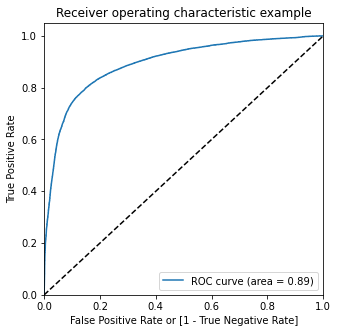

In [208]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

We can see that AUC is 89% which is good coverage.

#### Optimal CutOff Point

In [209]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,15406,0,0.256018,1,1,1,0,0,0,0,0,0,0
1,25289,0,0.466747,1,1,1,1,1,0,0,0,0,0
2,26422,0,0.037643,1,0,0,0,0,0,0,0,0,0
3,1173,1,0.778928,1,1,1,1,1,1,1,1,0,0
4,19065,0,0.358433,1,1,1,1,0,0,0,0,0,0


#### Evaluation

In [210]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.500000  1.000000  0.000000  0.500000
0.1   0.1  0.651384  0.974031  0.328737  0.592010
0.2   0.2  0.716152  0.950238  0.482065  0.647225
0.3   0.3  0.764488  0.919189  0.609786  0.701991
0.4   0.4  0.799451  0.877670  0.721232  0.758942
0.5   0.5  0.821351  0.828063  0.814638  0.817094
0.6   0.6  0.823683  0.759641  0.887725  0.871232
0.7   0.7  0.793490  0.649803  0.937176  0.911842
0.8   0.8  0.731158  0.496216  0.966100  0.936052
0.9   0.9  0.643531  0.299969  0.987093  0.958748


<Figure size 720x360 with 0 Axes>

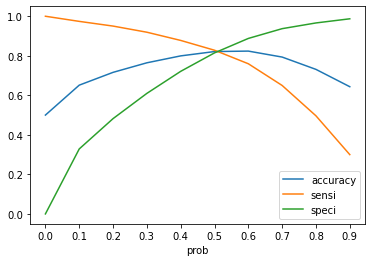

In [211]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.1))
plt.show()

**From the curve above, 0.52 is the optimum point to take it as a cutoff probability.**

In [212]:
# Applying the Optimal CutOff 
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,15406,0,0.256018,1,1,1,0,0,0,0,0,0,0,0
1,25289,0,0.466747,1,1,1,1,1,0,0,0,0,0,0
2,26422,0,0.037643,1,0,0,0,0,0,0,0,0,0,0
3,1173,1,0.778928,1,1,1,1,1,1,1,1,0,0,1
4,19065,0,0.358433,1,1,1,1,0,0,0,0,0,0,0


##### Accuracy - Train

In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8232687124196558

##### Confusion Matrix

In [214]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16030,  3262],
       [ 3557, 15735]])

In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity, Specificity and Precision

In [216]:
# Let's see the sensitivity of our logistic regression model (with PCA)
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8156230561890939
Specificity: 0.8309143686502177
Precision: 0.8282886771595515


#### Making Prediction - Test

In [217]:
#Making predictions on Test dataset

y_test_pred = logmodel14.fit().predict(sm.add_constant(X_test_scaled[cols]))

y_test_pred.head()

4710     0.025518
8970     0.118419
27111    0.186215
44126    0.982881
50828    0.192277
dtype: float64

In [218]:
#Checking a actual target variable

y_test.head()

4710     0
8970     0
27111    0
44126    1
50828    1
Name: churn, dtype: int64

In [219]:
#Merging the actual & predicted dataframes

y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),
                                            on = 'index')
y_test_pred_final.head()

,index,churn,churn_prob
0,4710,0,0.025518
1,8970,0,0.118419
2,27111,0,0.186215
3,44126,1,0.982881
4,50828,1,0.192277


In [220]:
# Applying Optimal CutOff point
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,4710,0,0.025518,0
1,8970,0,0.118419,0
2,27111,0,0.186215,0
3,44126,1,0.982881,1
4,50828,1,0.192277,0


##### Accuracy - Test

In [221]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8229317851959361

##### Confusion Matrix

In [222]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[6858, 1410],
       [1518, 6750]])

In [223]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity, Specificity and Precision

In [224]:
# Let's see the sensitivity of our logistic regression model (with PCA)
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.816400580551524
Specificity: 0.8294629898403484
Precision: 0.8272058823529411


## Conclusion

### Final Model

In [225]:
print(logmodel14.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16413.
Date:                Tue, 25 May 2021   Deviance:                       32825.
Time:                        01:20:36   Pearson chi2:                 4.54e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**`churn`** = -0.2124 - 0.1767`*`std_og_mou_8 - 1.9136`*`loc_ic_mou_8 - 0.6480`*`total_rech_data_8 - 0.6204`*`is_rech_8 + 0.2835`*`av_arpu_6_7 - 0.1995`*`av_total_rech_num_6_7 + 0.1431`*`av_max_rech_amt_6_7 - 0.4146`*`av_last_day_rch_amt_6_7 - 0.1380`*`av_av_rech_amt_data_6_7 + 0.3293`*`diff_total_ic_mou + 0.4815`*`diff_total_rech_num + 0.2102`*`diff_total_rech_amt - 0.0939`*`diff_max_rech_amt + 0.4375`*`diff_last_day_rch_amt

- Random forest with PCA has better prediction capability than the logistic regression with accuracy of 0.94 and 0.95 sensitivity
- std_og_mou_8,loc_ic_mou_8,total_rech_data_8,is_rech_8 are effecting the churn negatively decreasing the probability of churn and av_arpu_6_7,av_max_rech_amt_6_7,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt and diff_last_day_rch_amt are effecting the churn positively, increasing the probability of churn.
- From this we can say that std_og & loc_ic and recharge variables (total recharge & if customer has done recharge) are causing the churn, which may mean that competition are offering better rates & offers on recharge, which may be resulting in churn.

## Recommendation

-Lower the call charges as this is one of the reasons for pre-paid customers to seek out other cheaper operators.
-Customized pre-paid plan offers can be issued: For example customized plans based on where customer minutes of usage are higher - for instance outgoing/std/t2t/t2m etc .  
-For customers who are staying longer with network we can increase customer loyalty points and offer some special discounts.